# Dekompozycja szeregu czasowego za pomocą metody STL, korzystając z modułu dostępnego w bibliotece statsmodels.

### Autor: Grzegorz Cichy, 405708

In [1]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import numpy as np
import itables
from itables import show
from itables import init_notebook_mode
import copy
from statsmodels.tsa.seasonal import STL

### **1. Wczytanie danych**

In [2]:
df = pd.read_csv('CO2 dataset.csv',index_col='Decimal Date')
df = df.dropna()
df

Year  Month  Carbon Dioxide (ppm)  \
Decimal Date                                      
1958.2027     1958      3                315.69   
1958.2877     1958      4                317.45   
1958.3699     1958      5                317.50   
1958.5370     1958      7                315.86   
1958.6219     1958      8                314.93   
...            ...    ...                   ...   
2016.7077     2016      9                401.01   
2016.7896     2016     10                401.50   
2016.8743     2016     11                403.64   
2016.9563     2016     12                404.55   
2017.0411     2017      1                406.07   

              Seasonally Adjusted CO2 (ppm)  Carbon Dioxide Fit (ppm)  \
Decimal Date                                                            
1958.2027                            314.42                    316.18   
1958.2877                            315.15                    317.30   
1958.3699                            314.73                    317.83   
1958.5370                            315.17                    315.87   
1958.6219                            316.17                    314.01   
...                                     ...                       ...   
2016.7077                            404.52                    401.33   
2016.7896                            405.12                    401.48   
2016.8743                            405.92                    403.08   
2016.9563                            405.49                    404.66   
2017.0411                            406.04                    405.87   

              Seasonally Adjusted CO2 Fit (ppm)  
Decimal Date                                     
1958.2027                                314.89  
1958.2877                                314.98  
1958.3699                                315.06  
1958.5370                                315.21  
1958.6219                                315.29  
...                                         ...  
2016.7077                                404.85  
2016.7896                                405.09  
2016.8743                                405.34  
2016.9563                                405.58  
2017.0411                                405.83  

[702 rows x 6 columns]

**Funkcja rysująca wykresy trendu, sezonowości i residuów**

In [11]:

def draw_plot(trend, seasonal, residual, s, p):
    fig, ax = plt.subplots(3, 1, figsize=(20, 10))

    sns.lineplot(data=trend, ax=ax[0])
    ax[0].set_title('Trend')

    sns.lineplot(data=seasonal, ax=ax[1])
    ax[1].set_title('Seasonal')

    sns.scatterplot(residual, ax=ax[2])
    ax[2].set_title('Residual')
    
    plt.suptitle(f'STL dla parametrów seasonal = {s}, period = {p}')
    
    plt.tight_layout()


    plt.show()

### **2. Testy i obserwacje dla różnych wartości parametrów period i seasonal.**
### Dekompozycja STL dla różnych wartości parametru period. Testowane wartości parametru: <2,15>. 

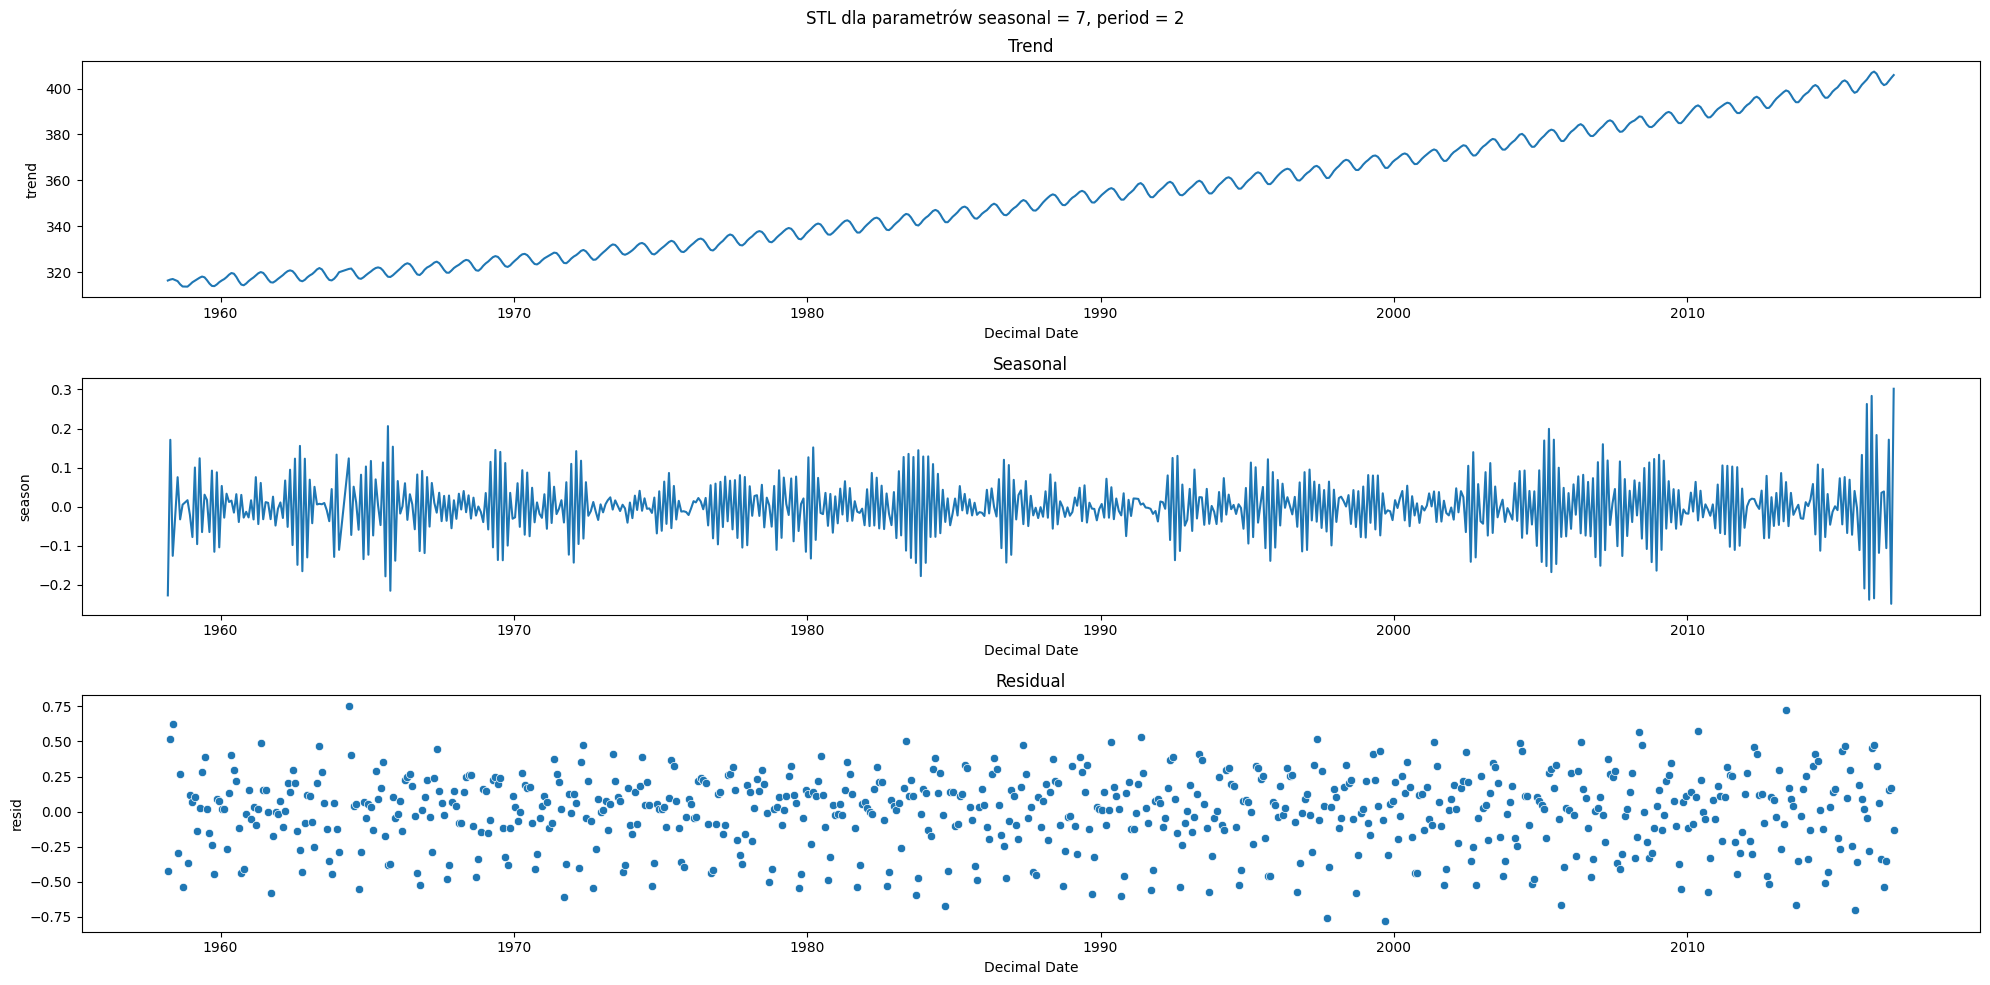

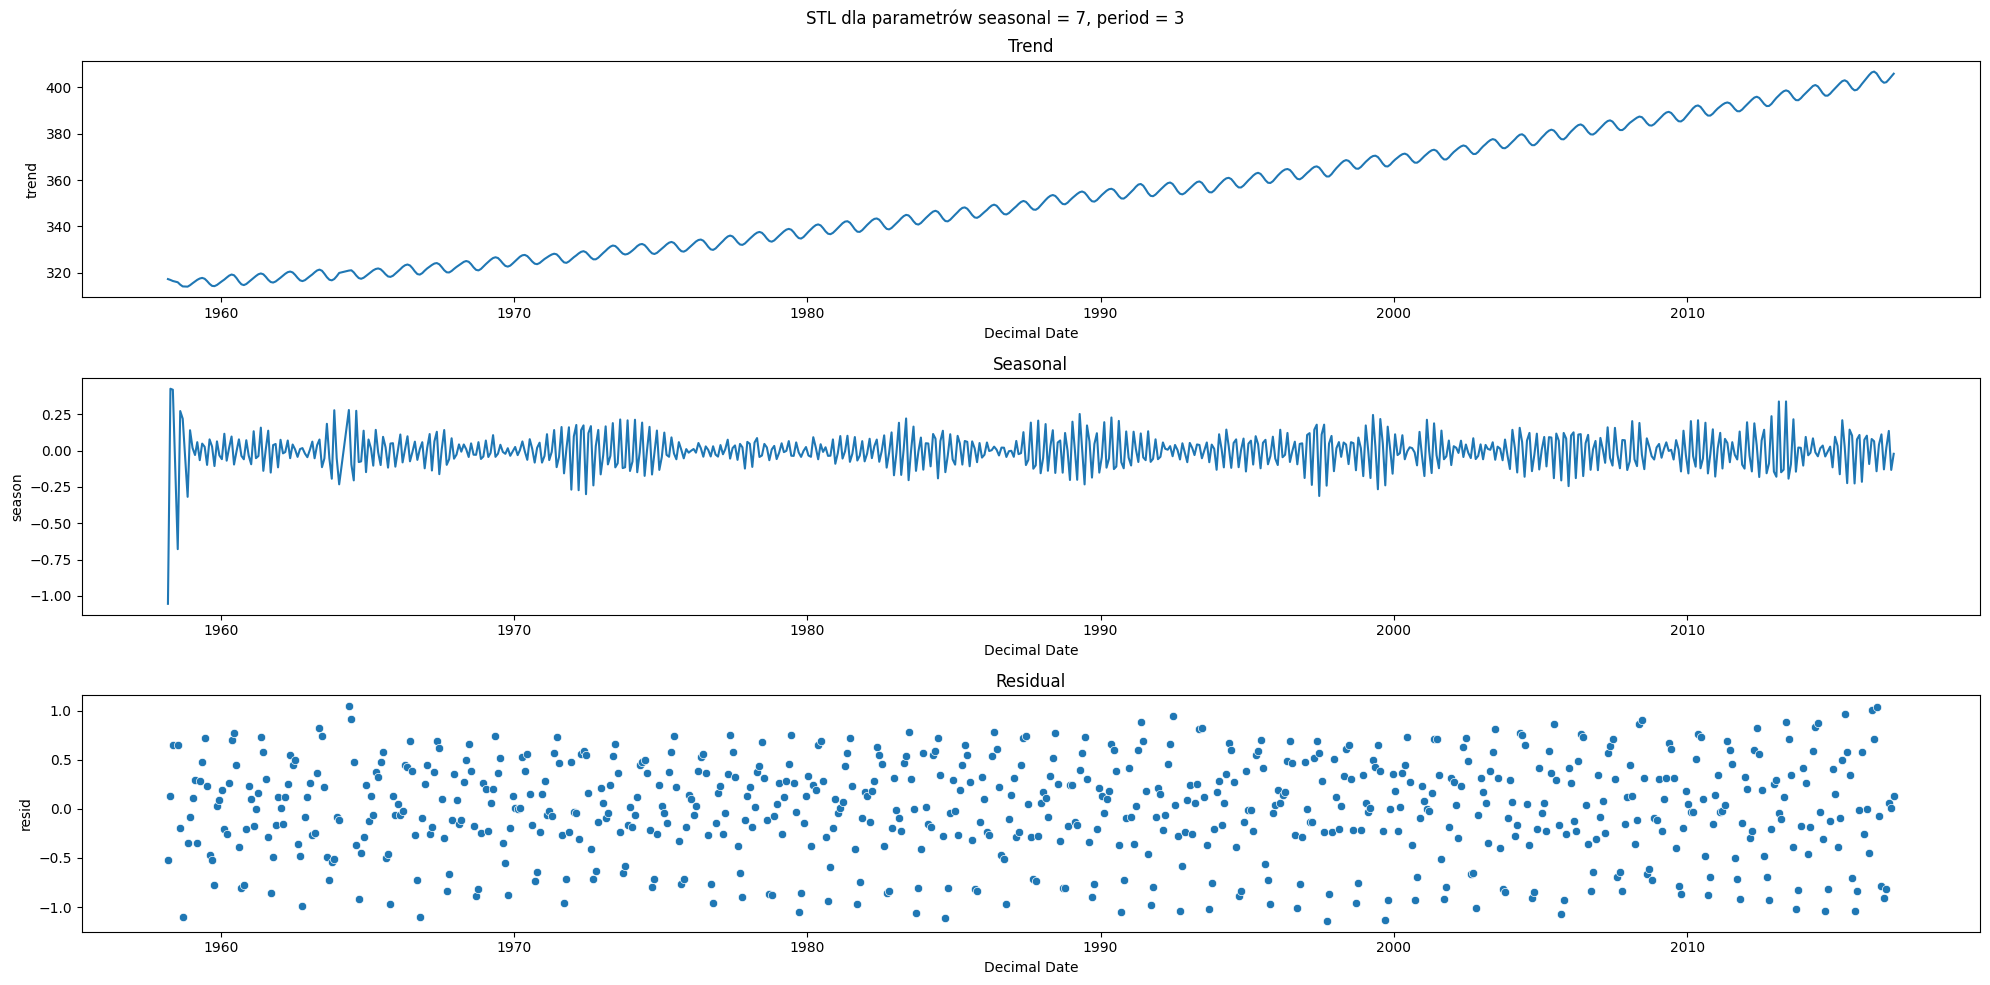

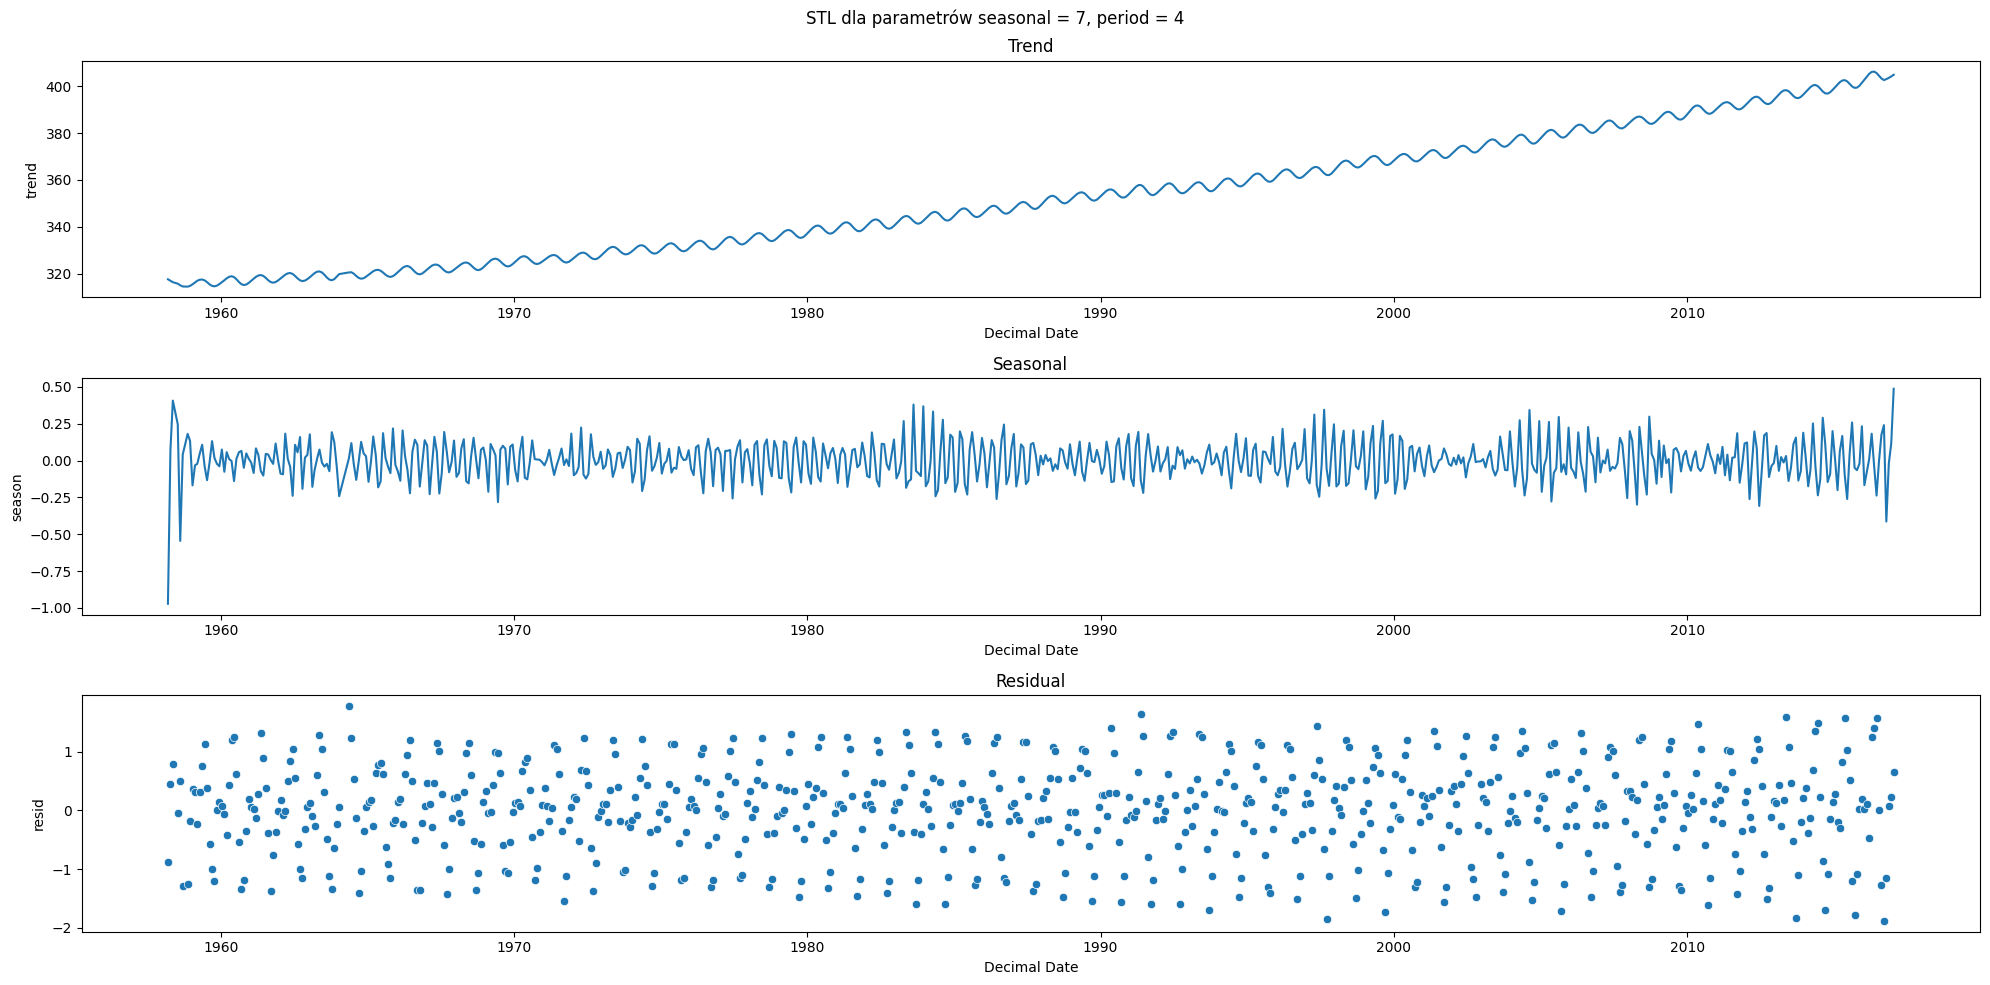

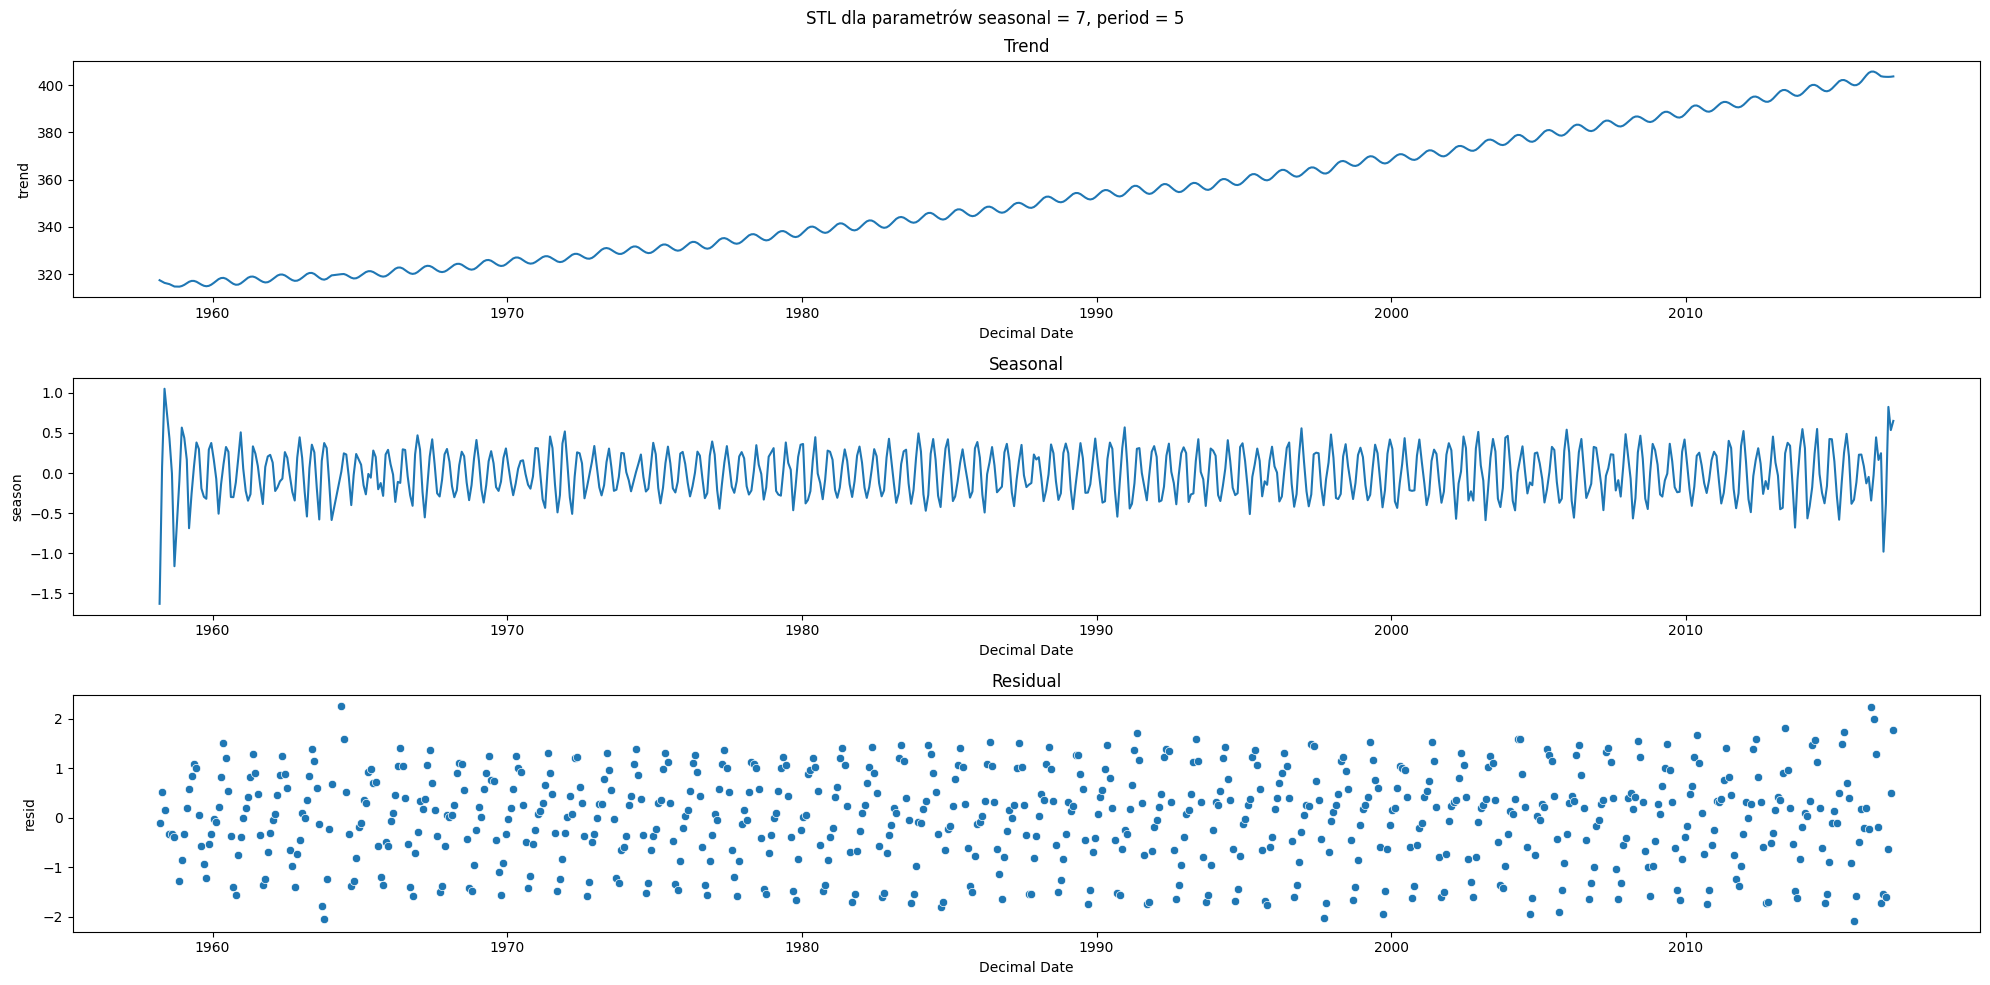

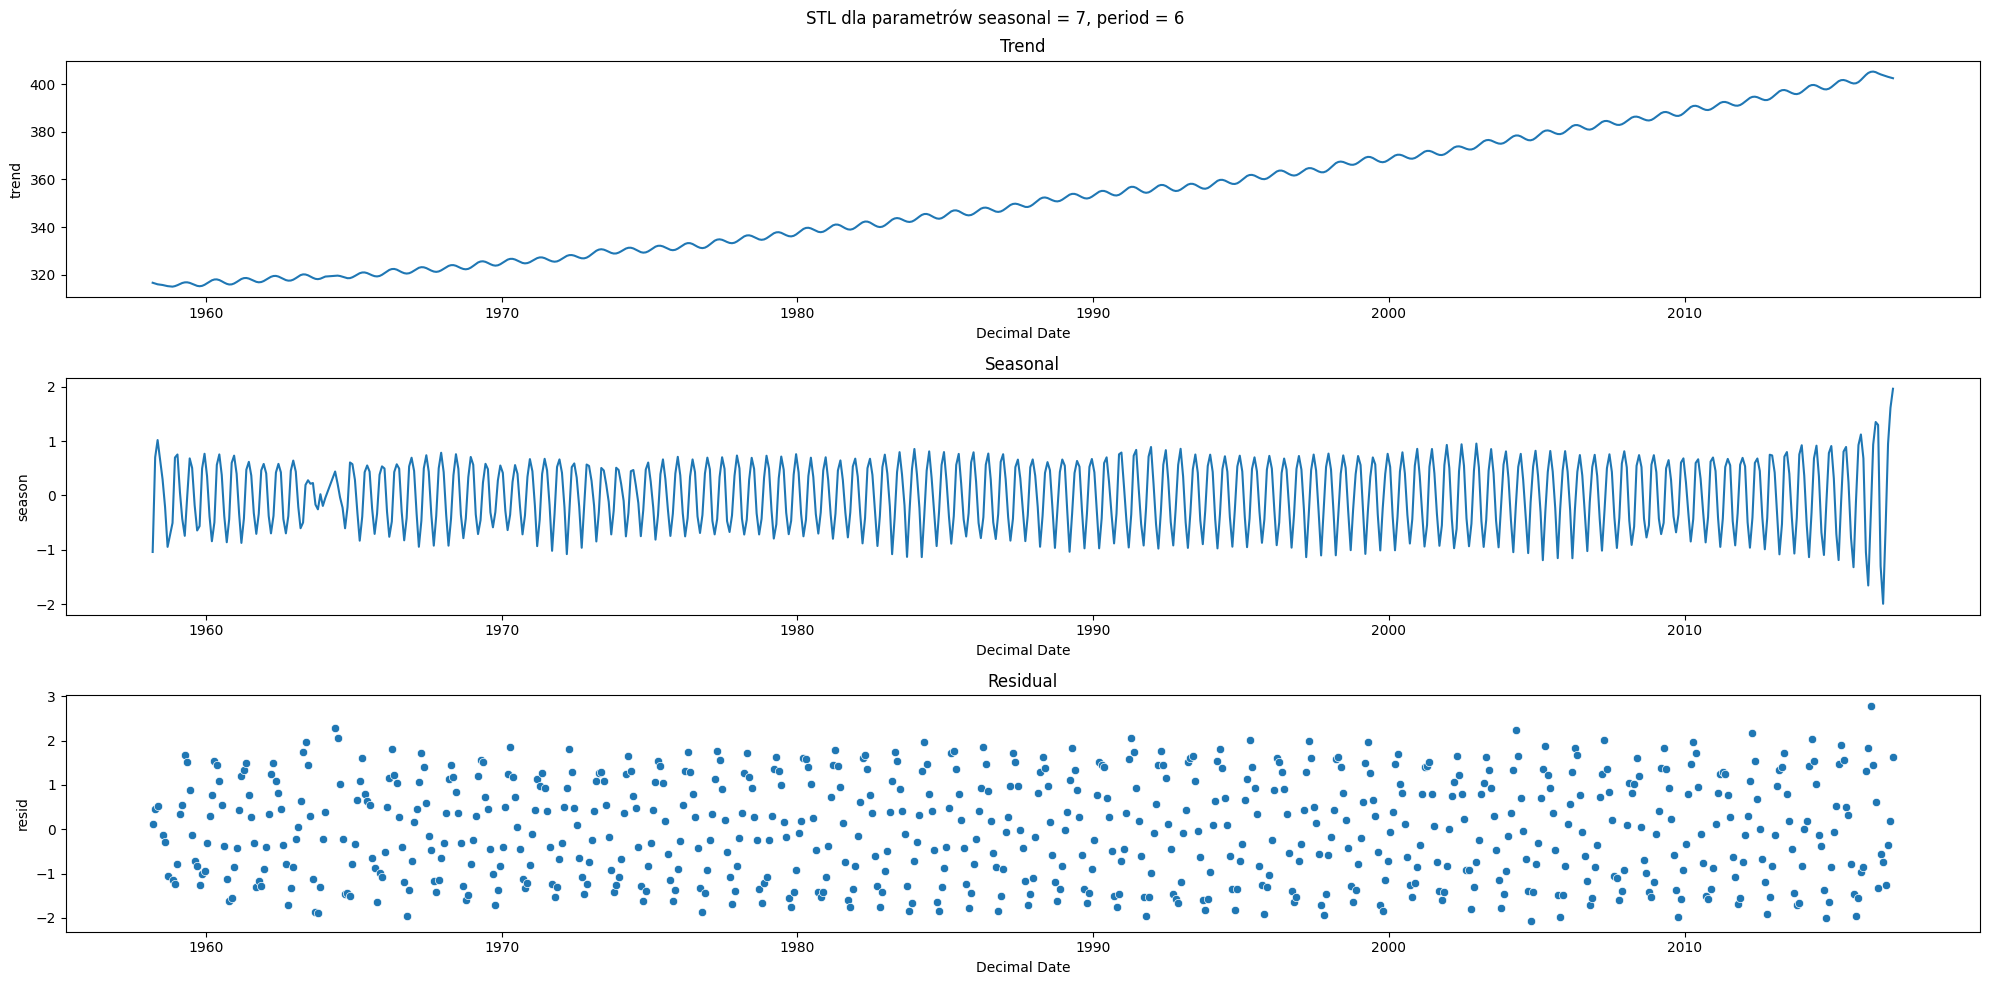

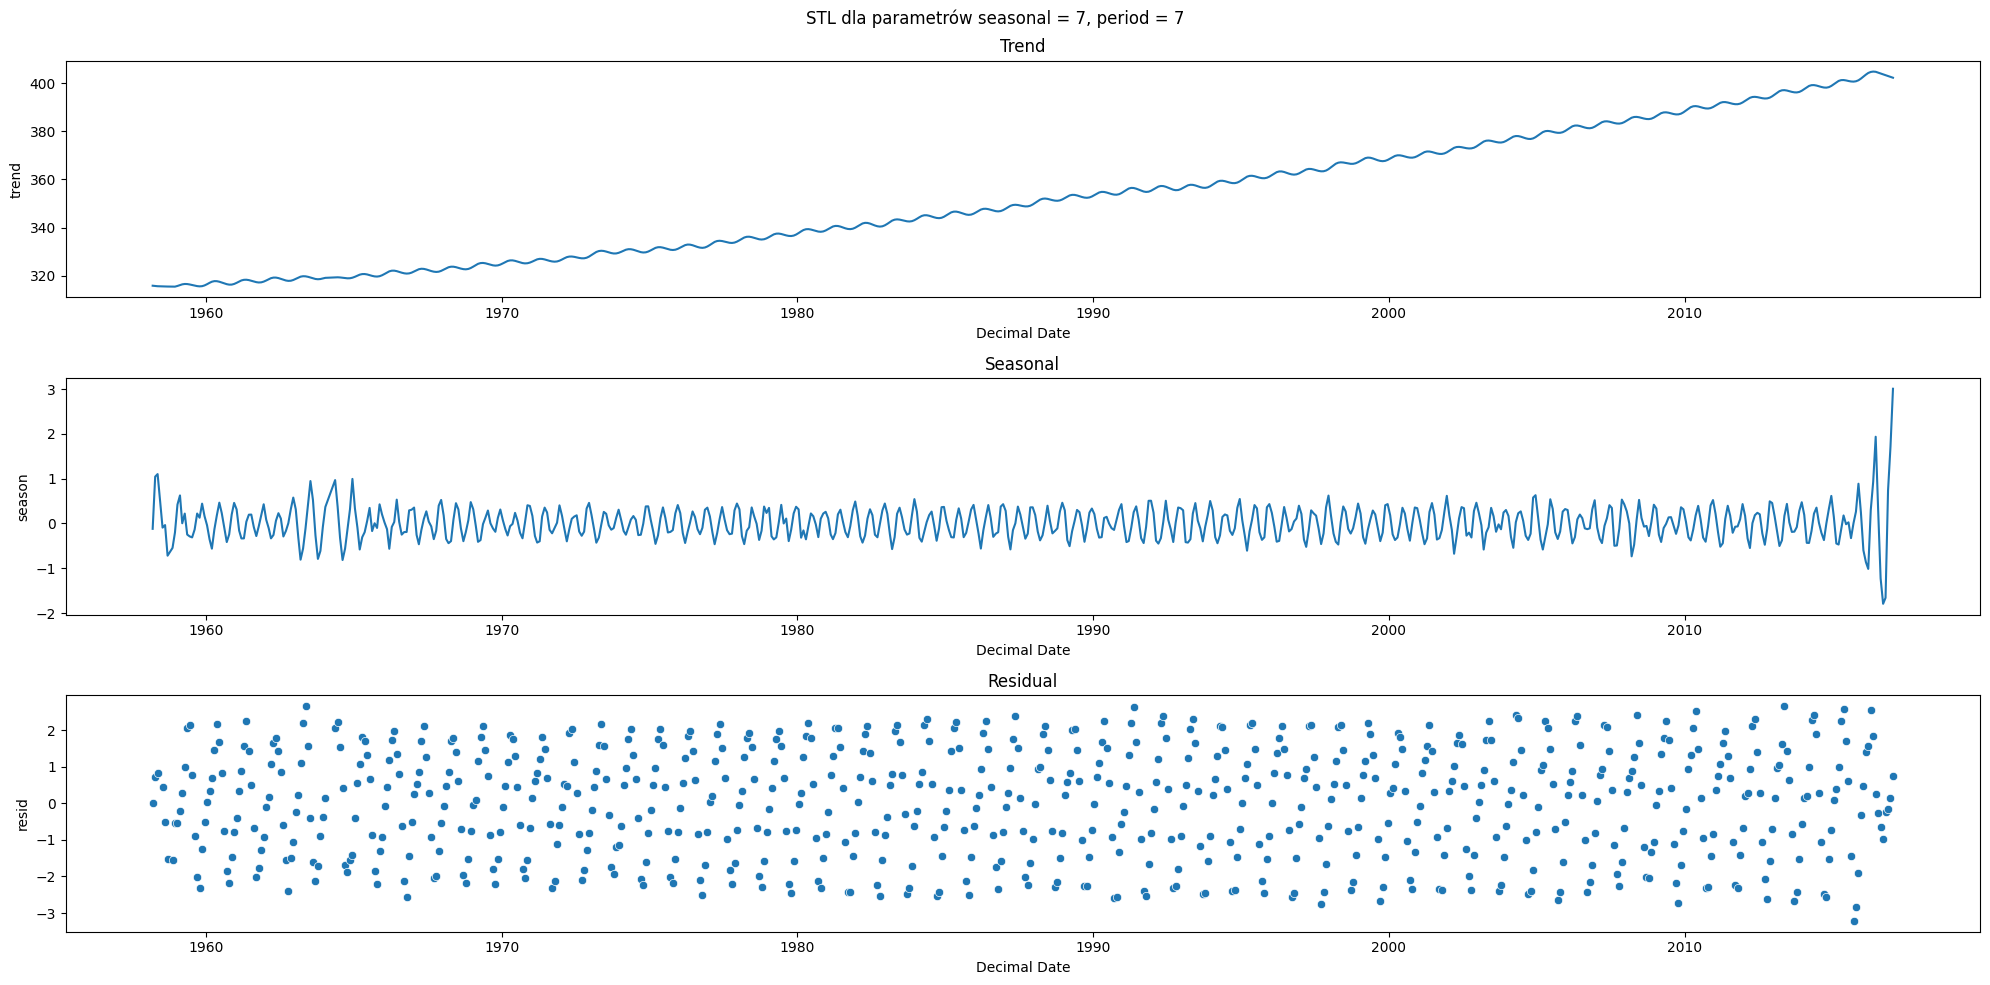

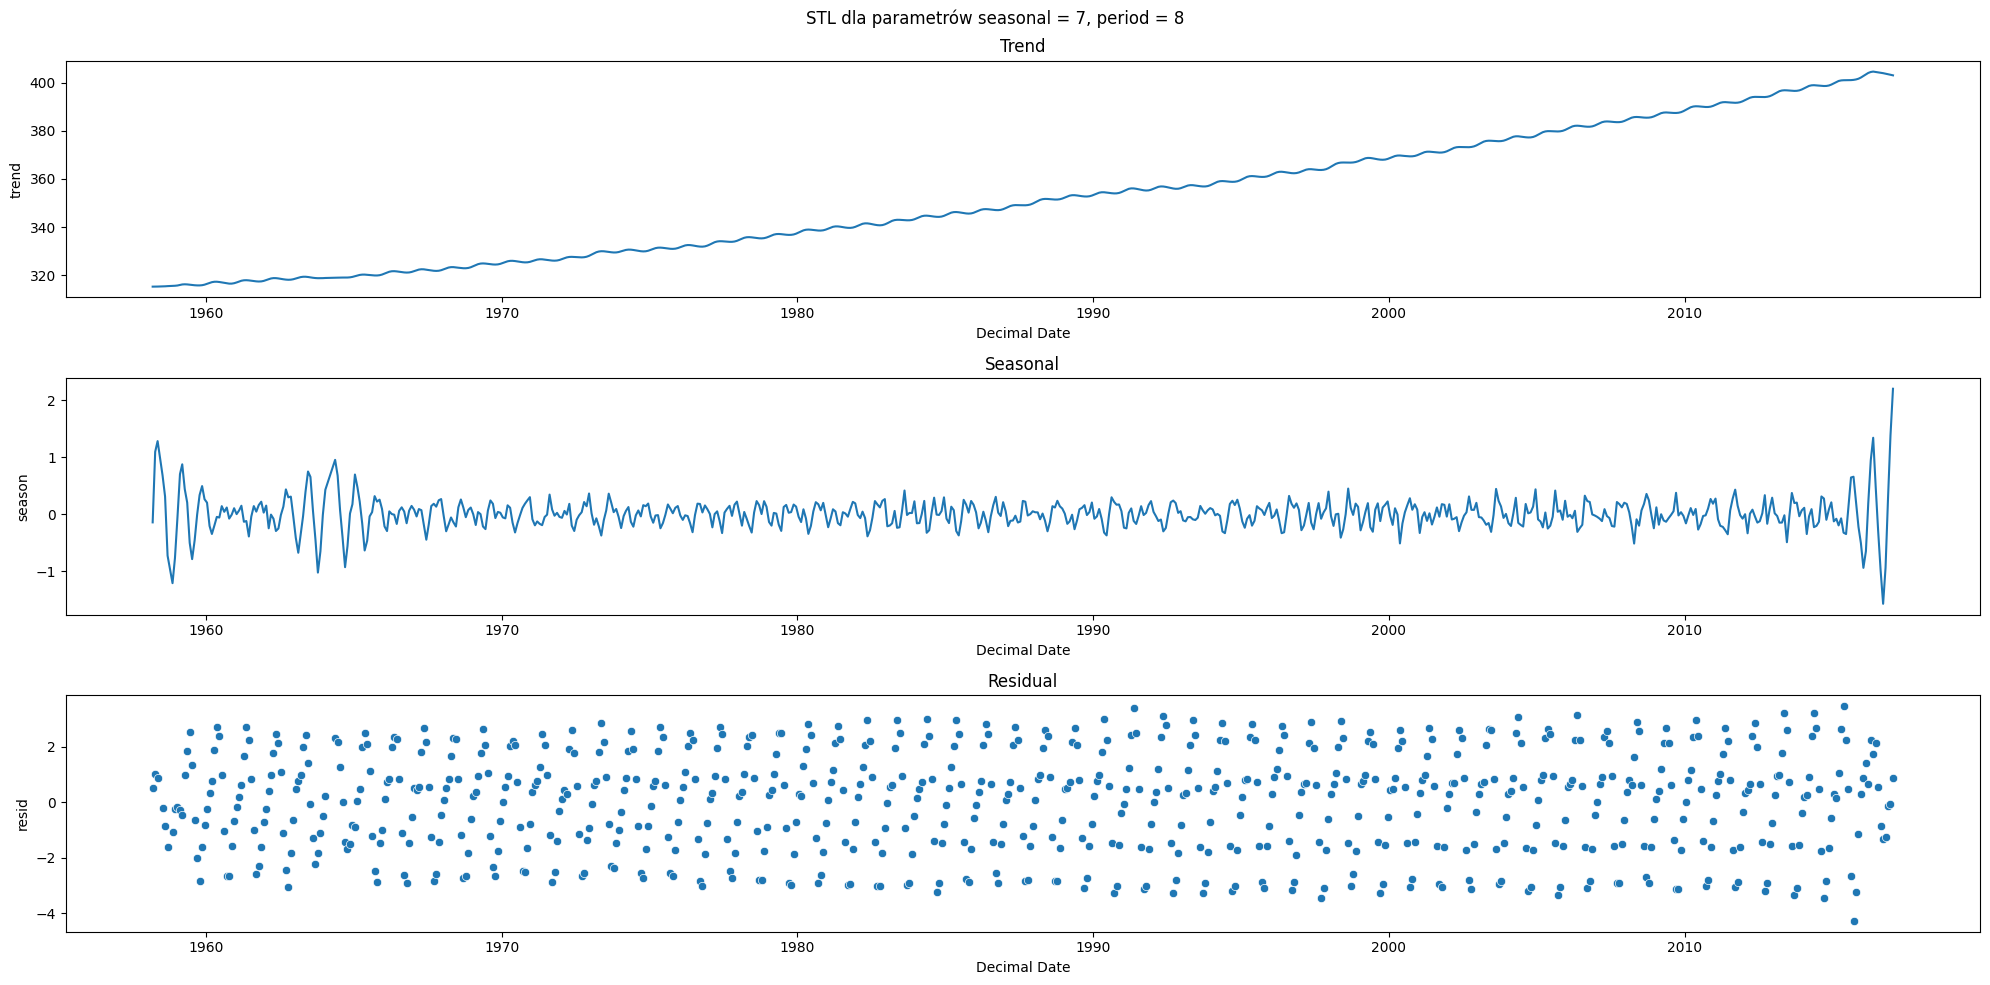

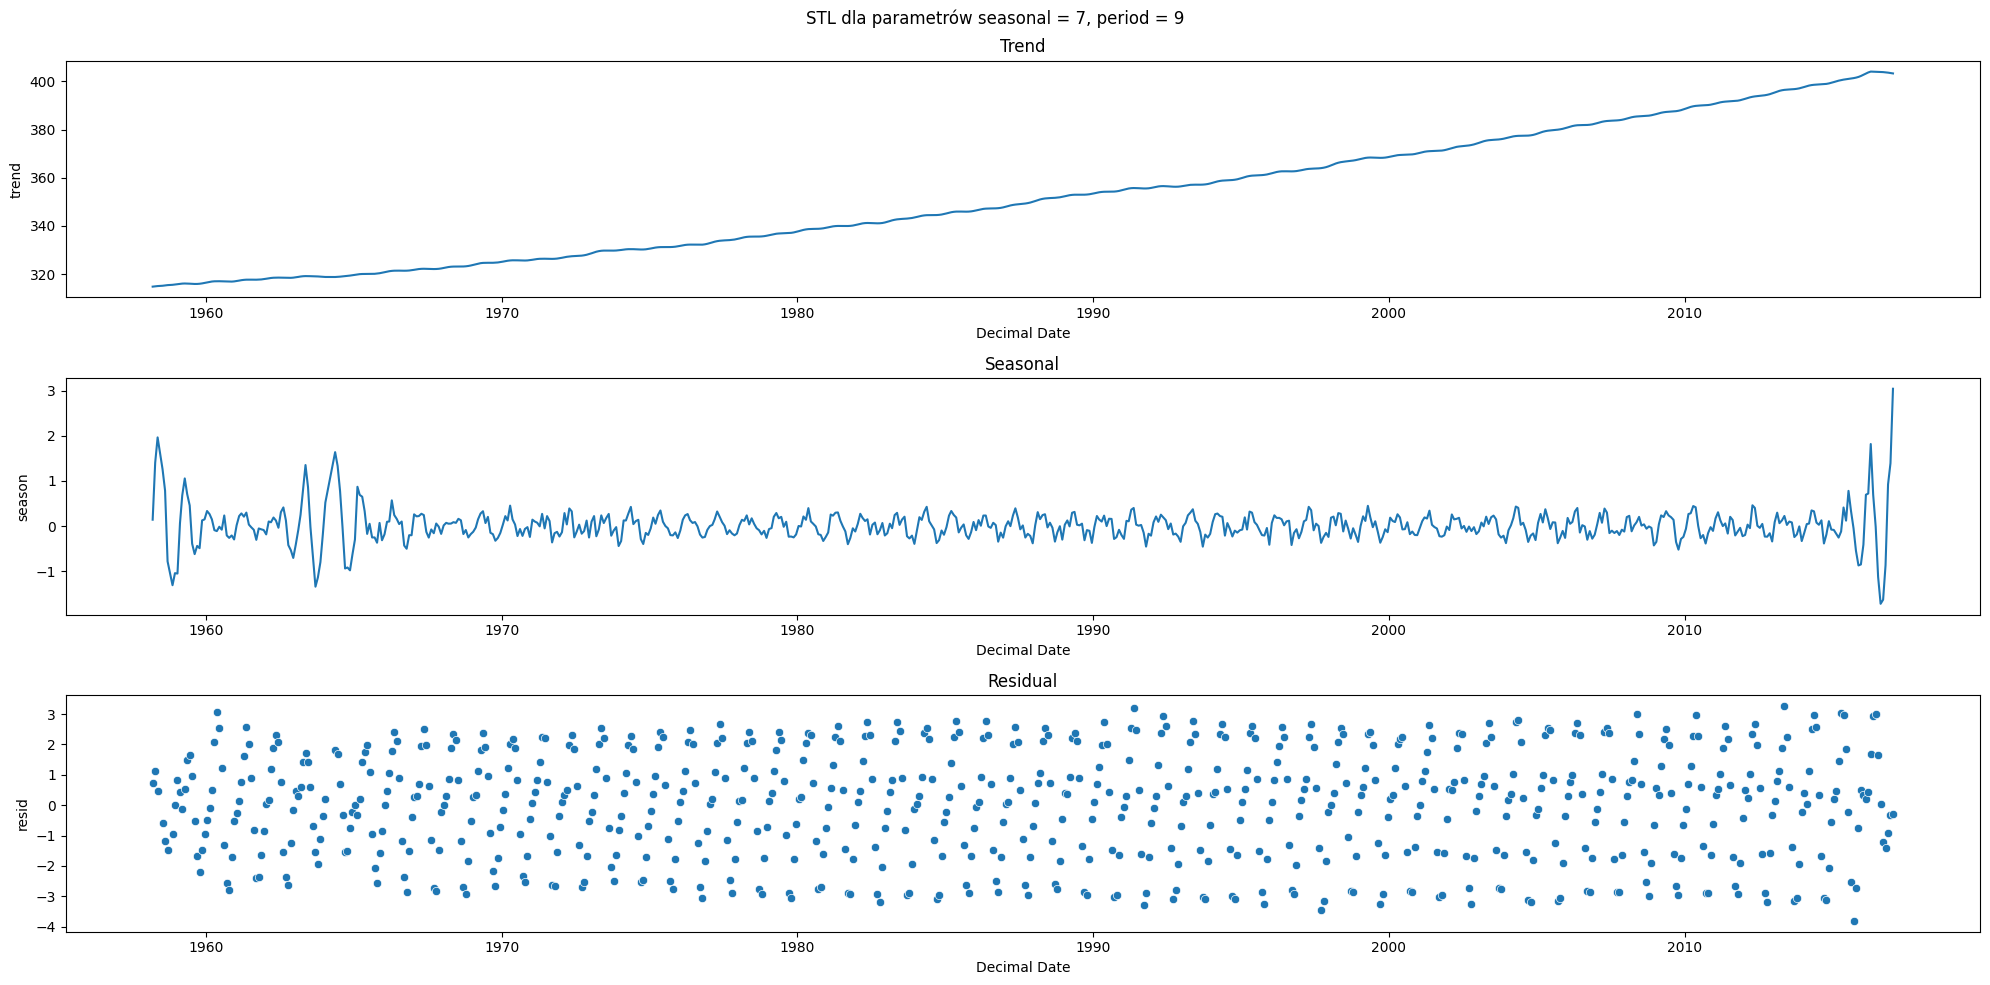

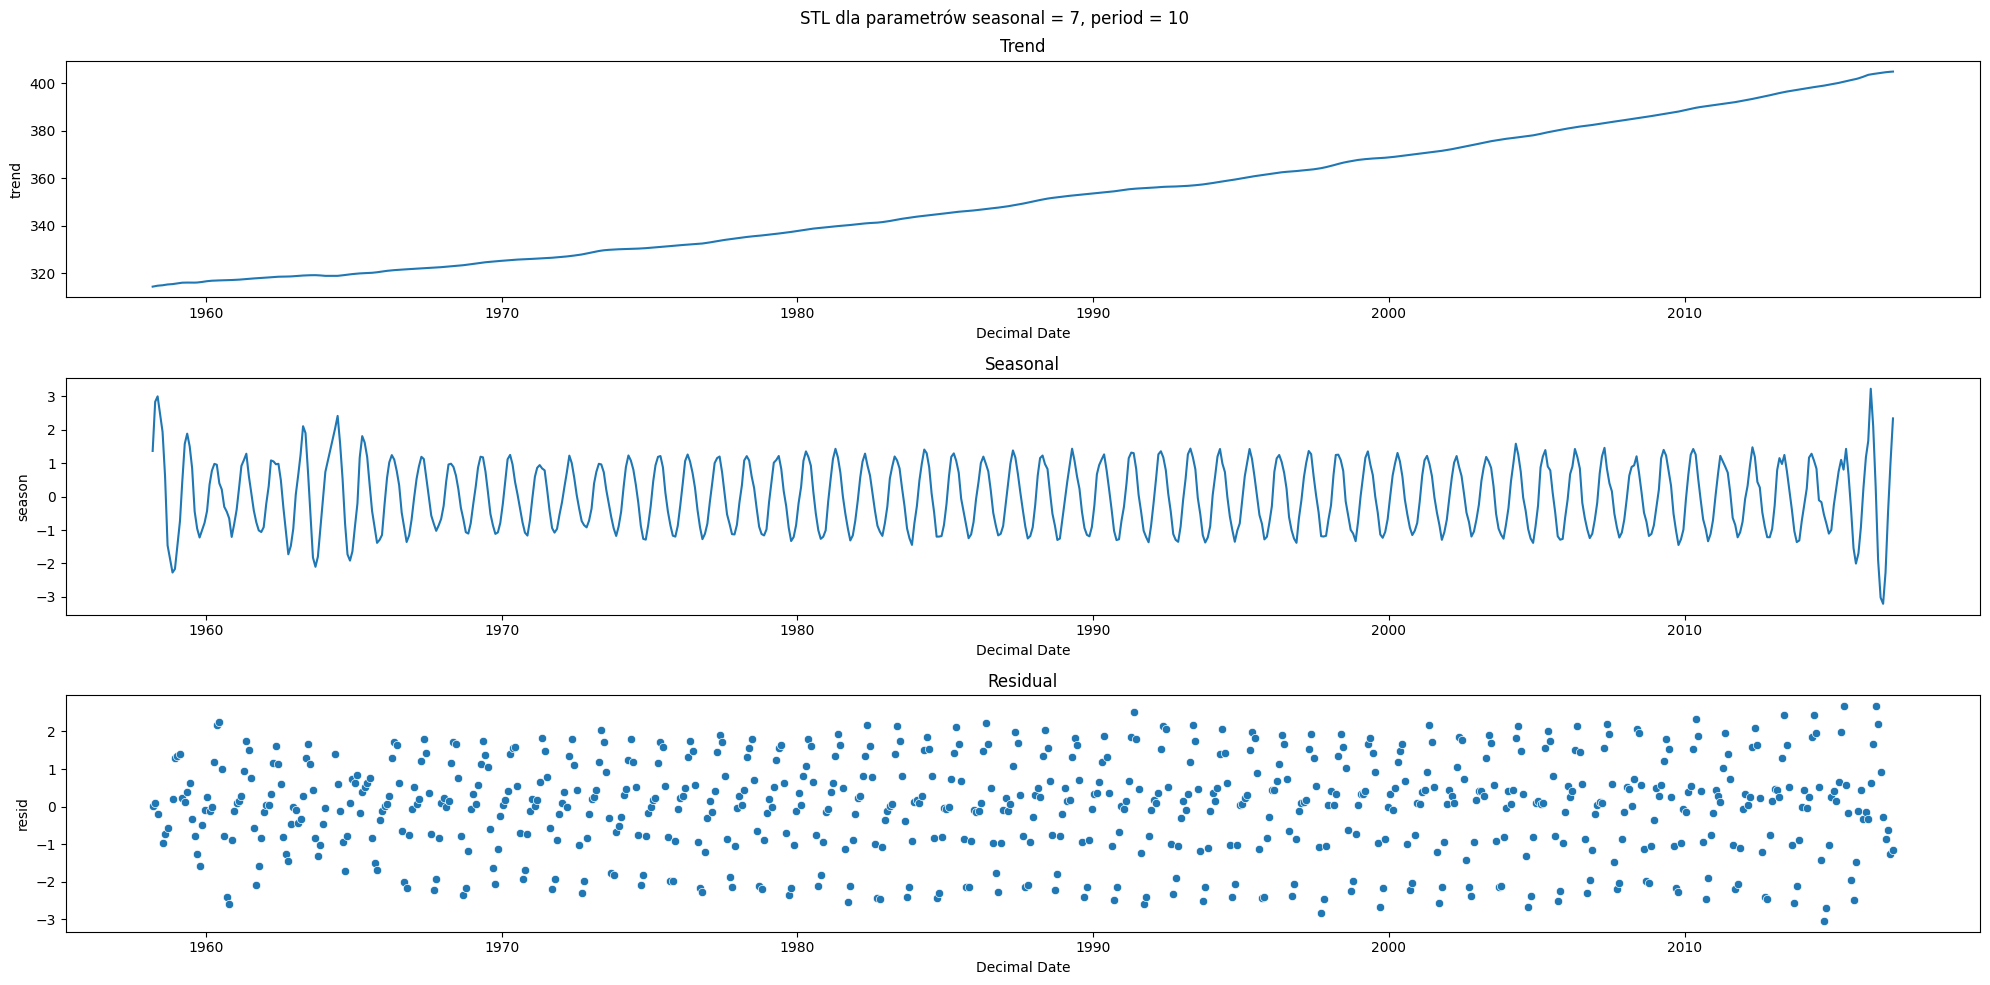

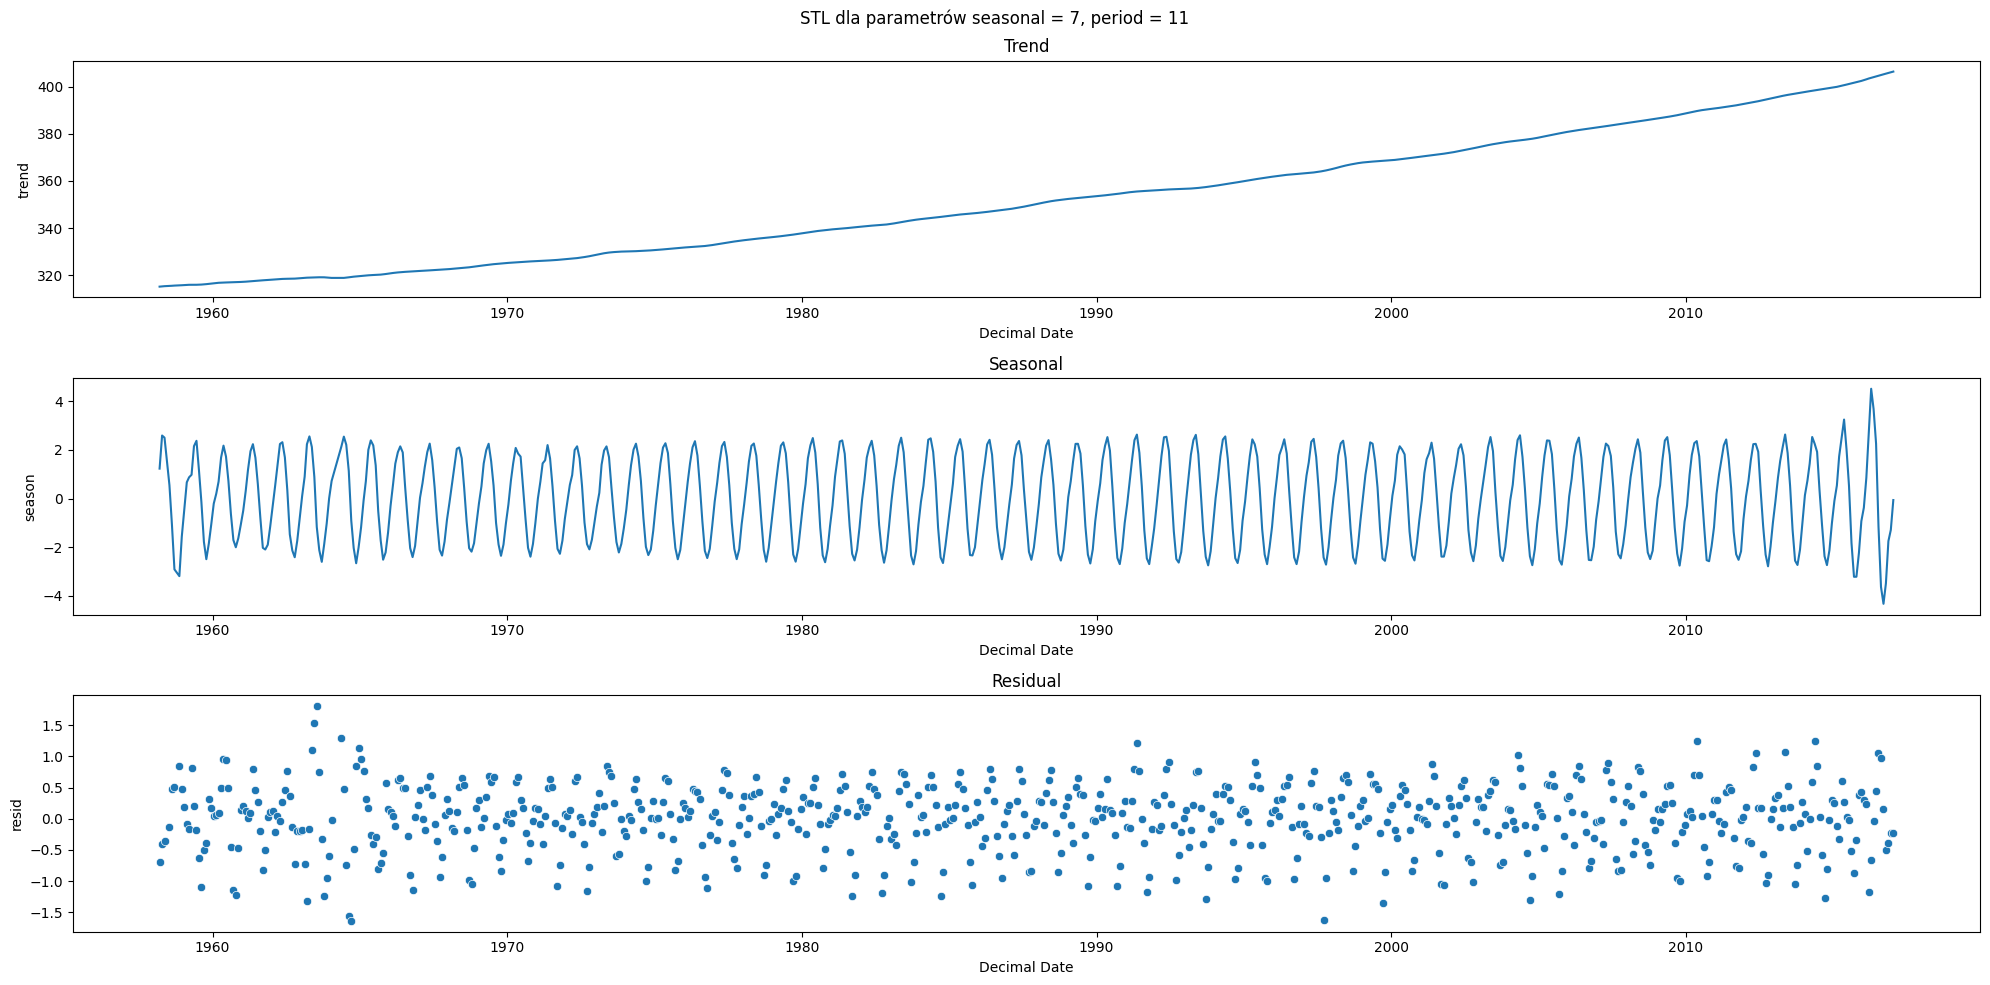

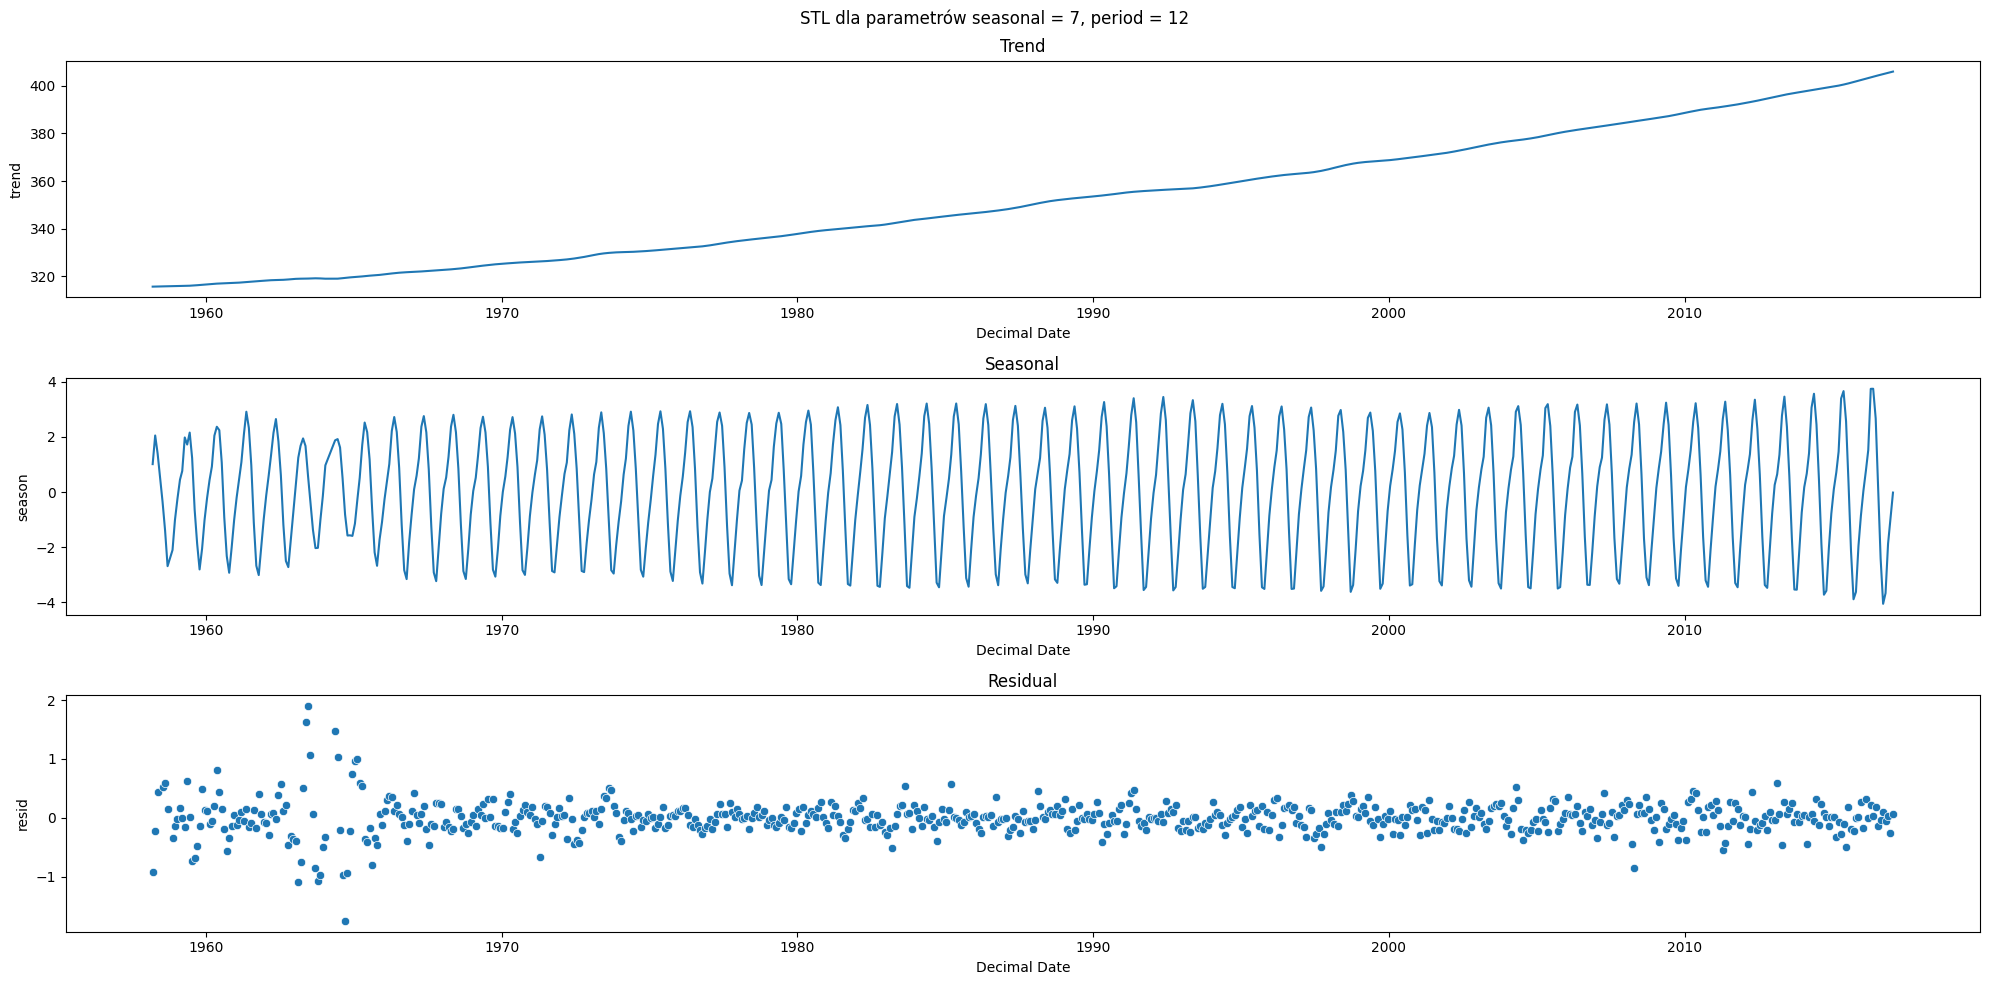

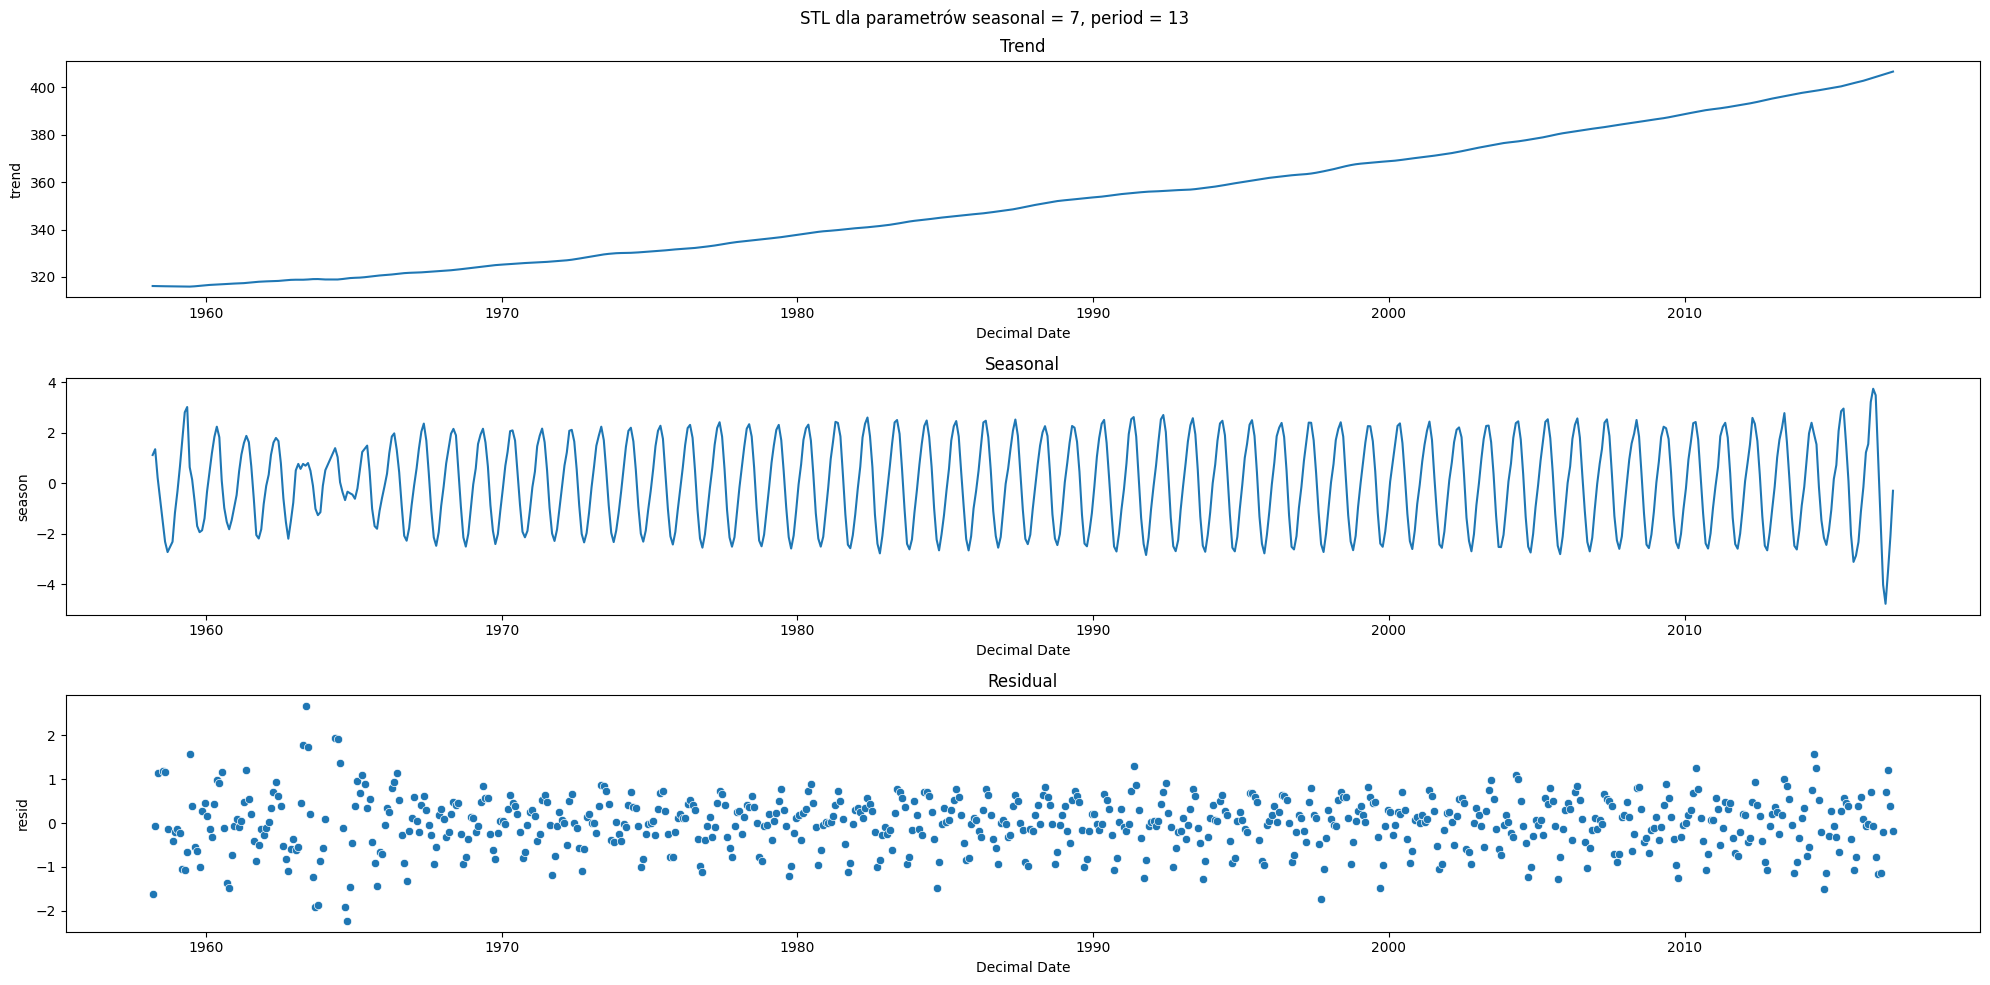

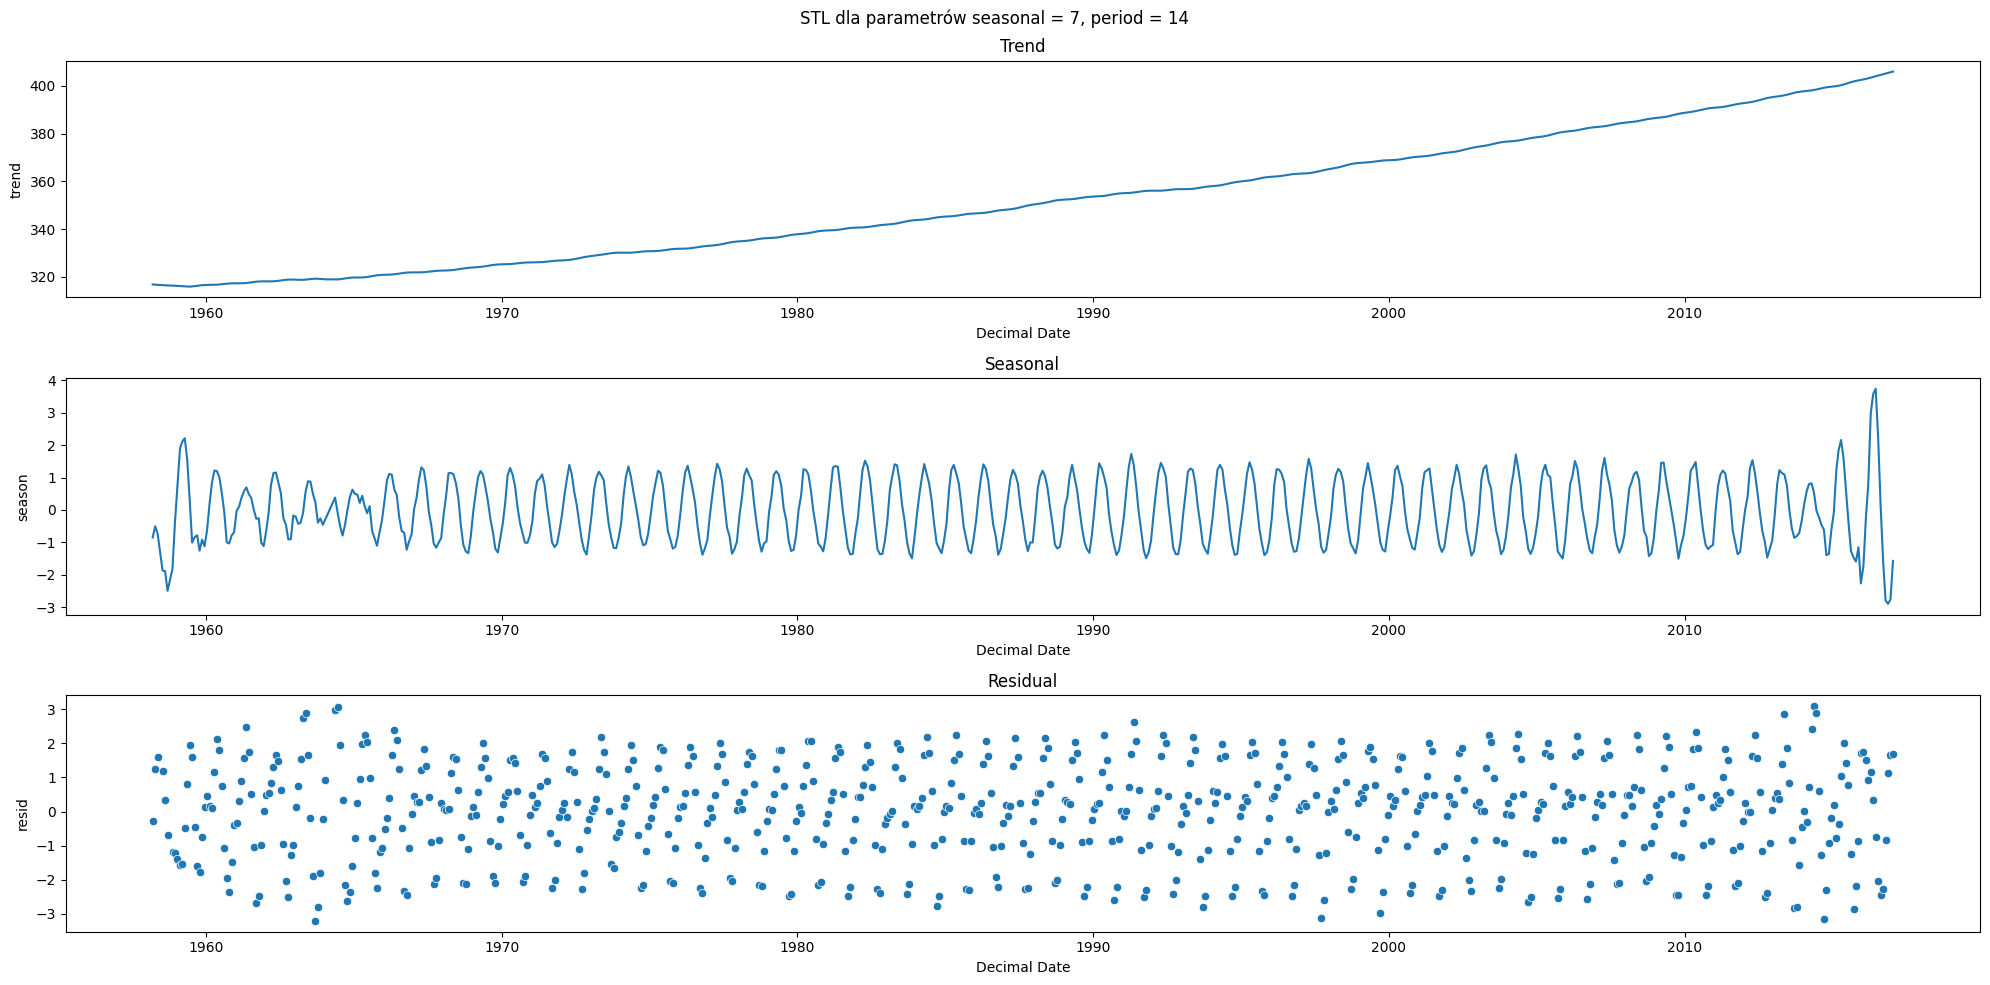

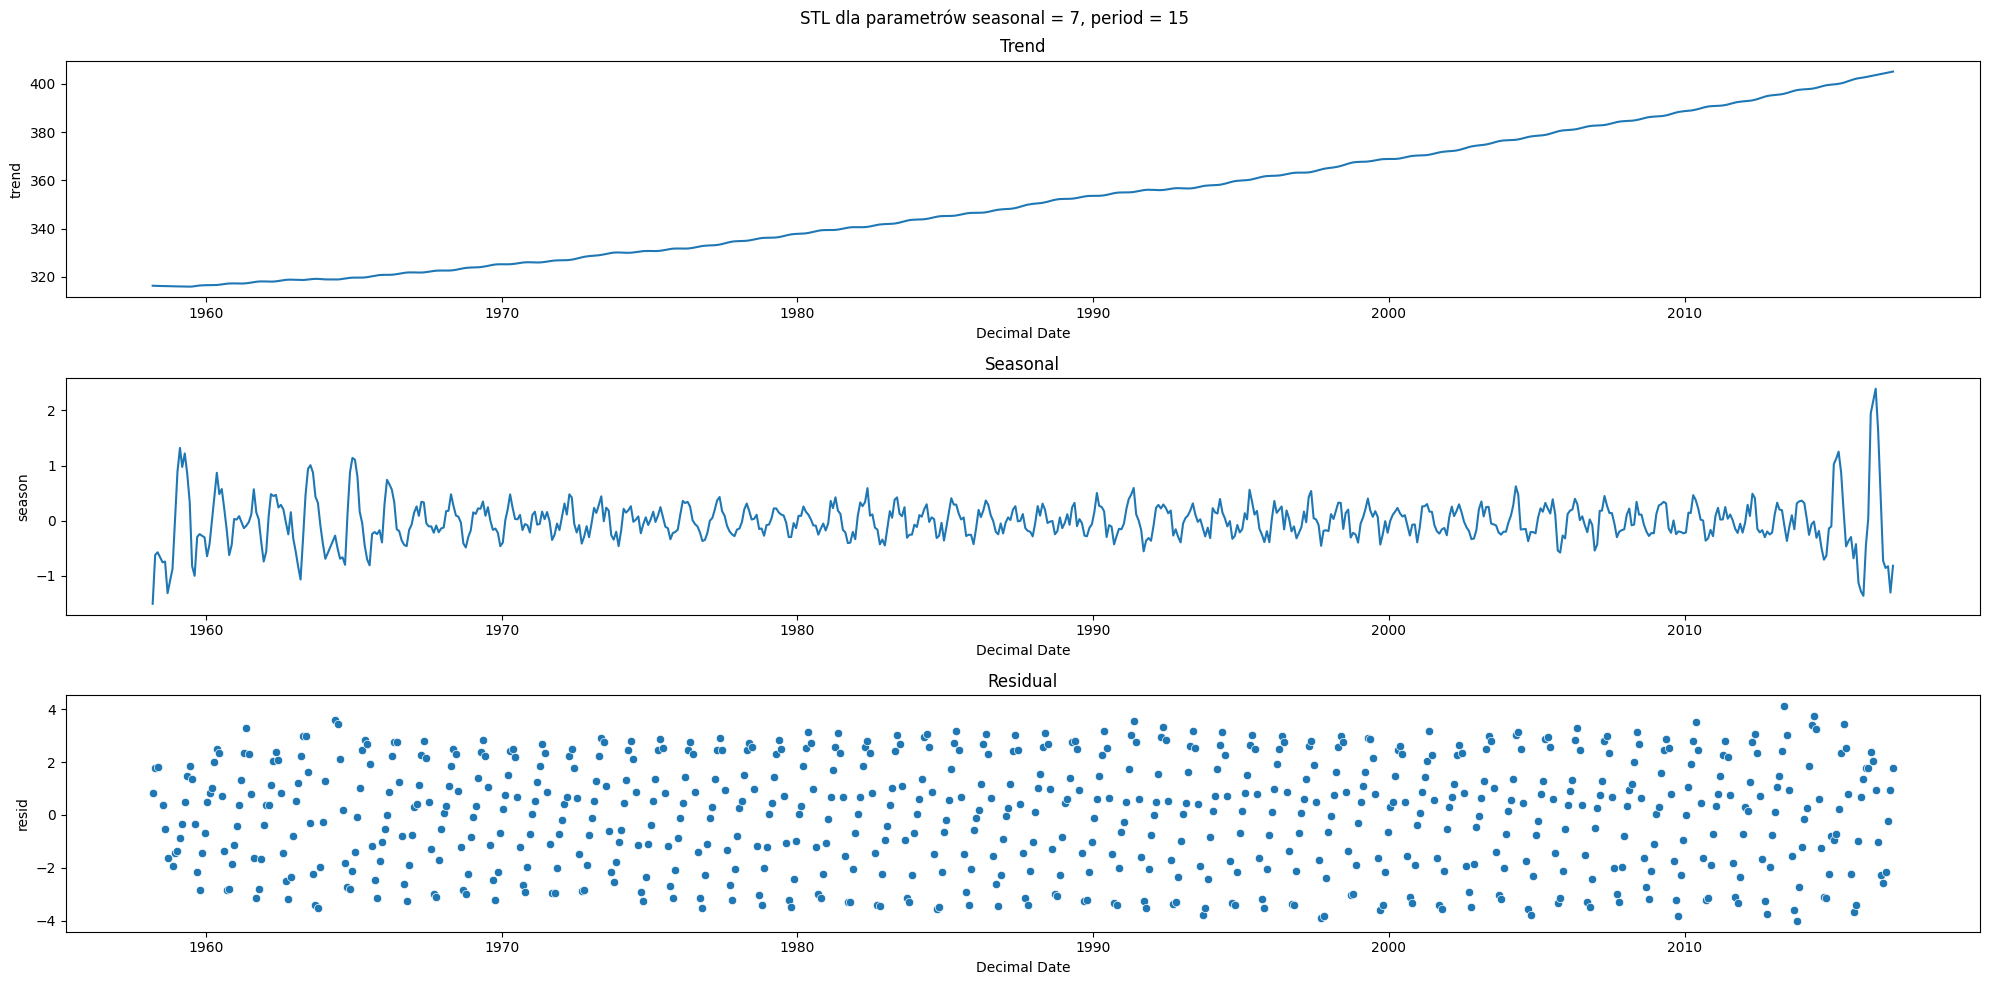

In [12]:
for p in range(2,16):
    result = STL(df['Carbon Dioxide (ppm)'], seasonal=7, period= p).fit()
    trend, seasonal, residual = result.trend, result.seasonal, result.resid
    
    draw_plot(trend, seasonal, residual,7,p)

Patrząc na generowane wykresy można wyciągnąć następujące wnioski:
- dla małych wartości parametru period widać, że wykres trendu nie jest pozbawiony komponentu sezonowego, co przekreśla te wartości.
- im mniejszy okres tym większa częstotliwość wykresu przedstawiającego magnitudę sezonowości. Ponadto największe amplitudy sezonowości występują dla period = 12.
- Zdecydowanie najmniejsze wartości residuów występują dla wartości period = 12 i to na tym wykresie najlepiej widać, że w danych mamy do czynienia z trendem 12 miesięcznym, czyli rocznym.


### Dekompozycja STL dla różnych wartości parametru seasonal, przy period = 12. Testowane wartości parametru: <3,21> z krokiem 2. 

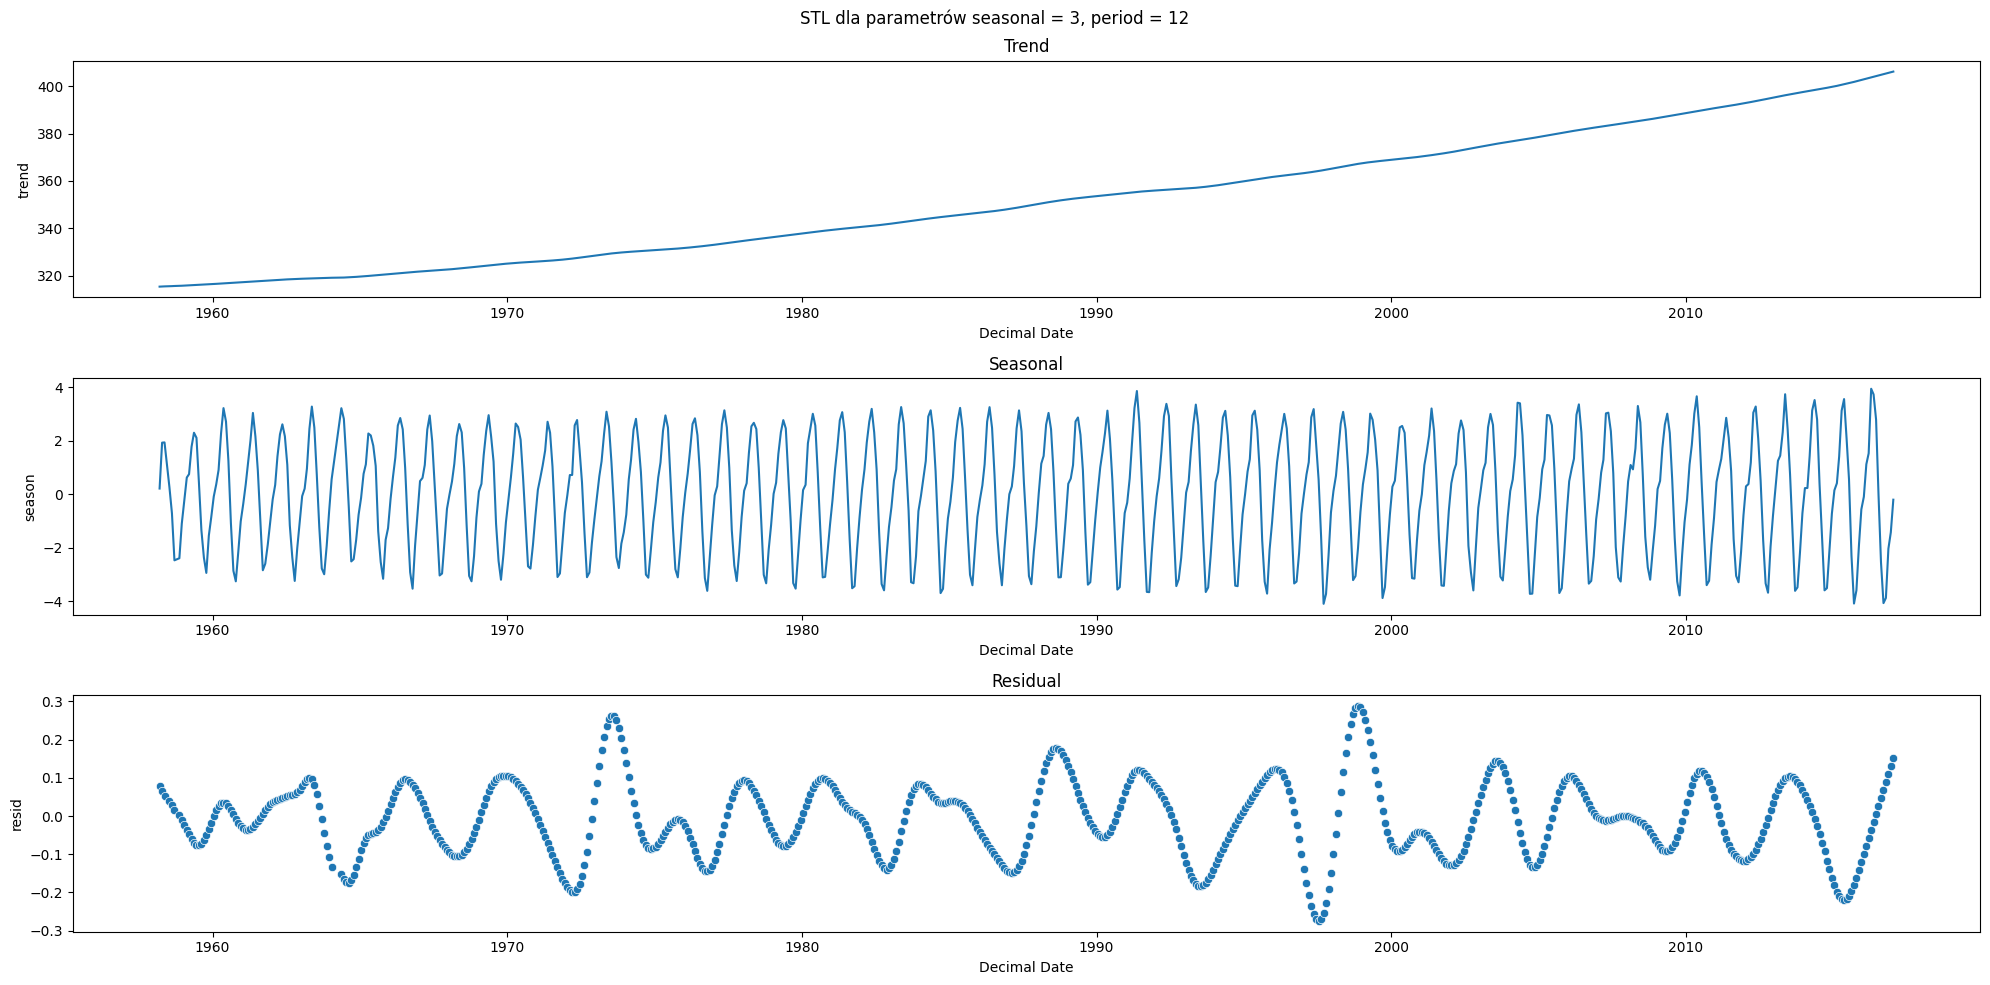

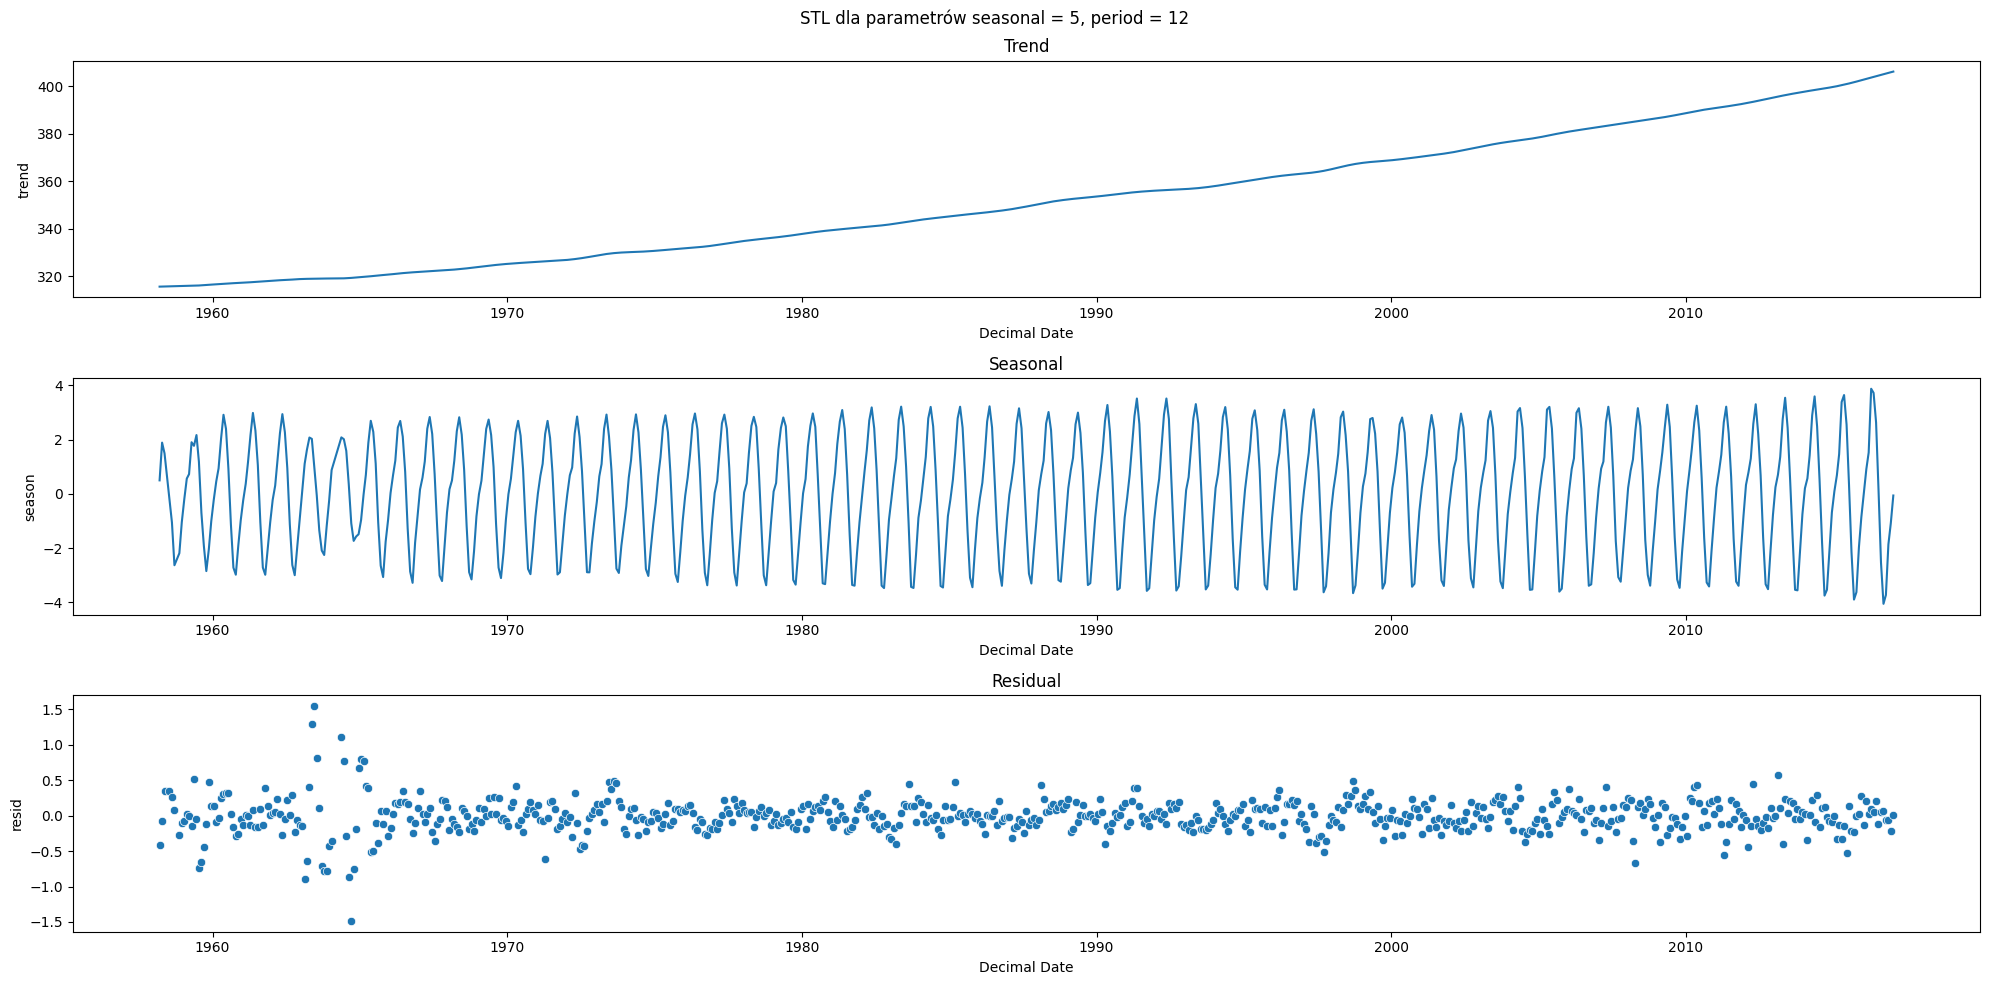

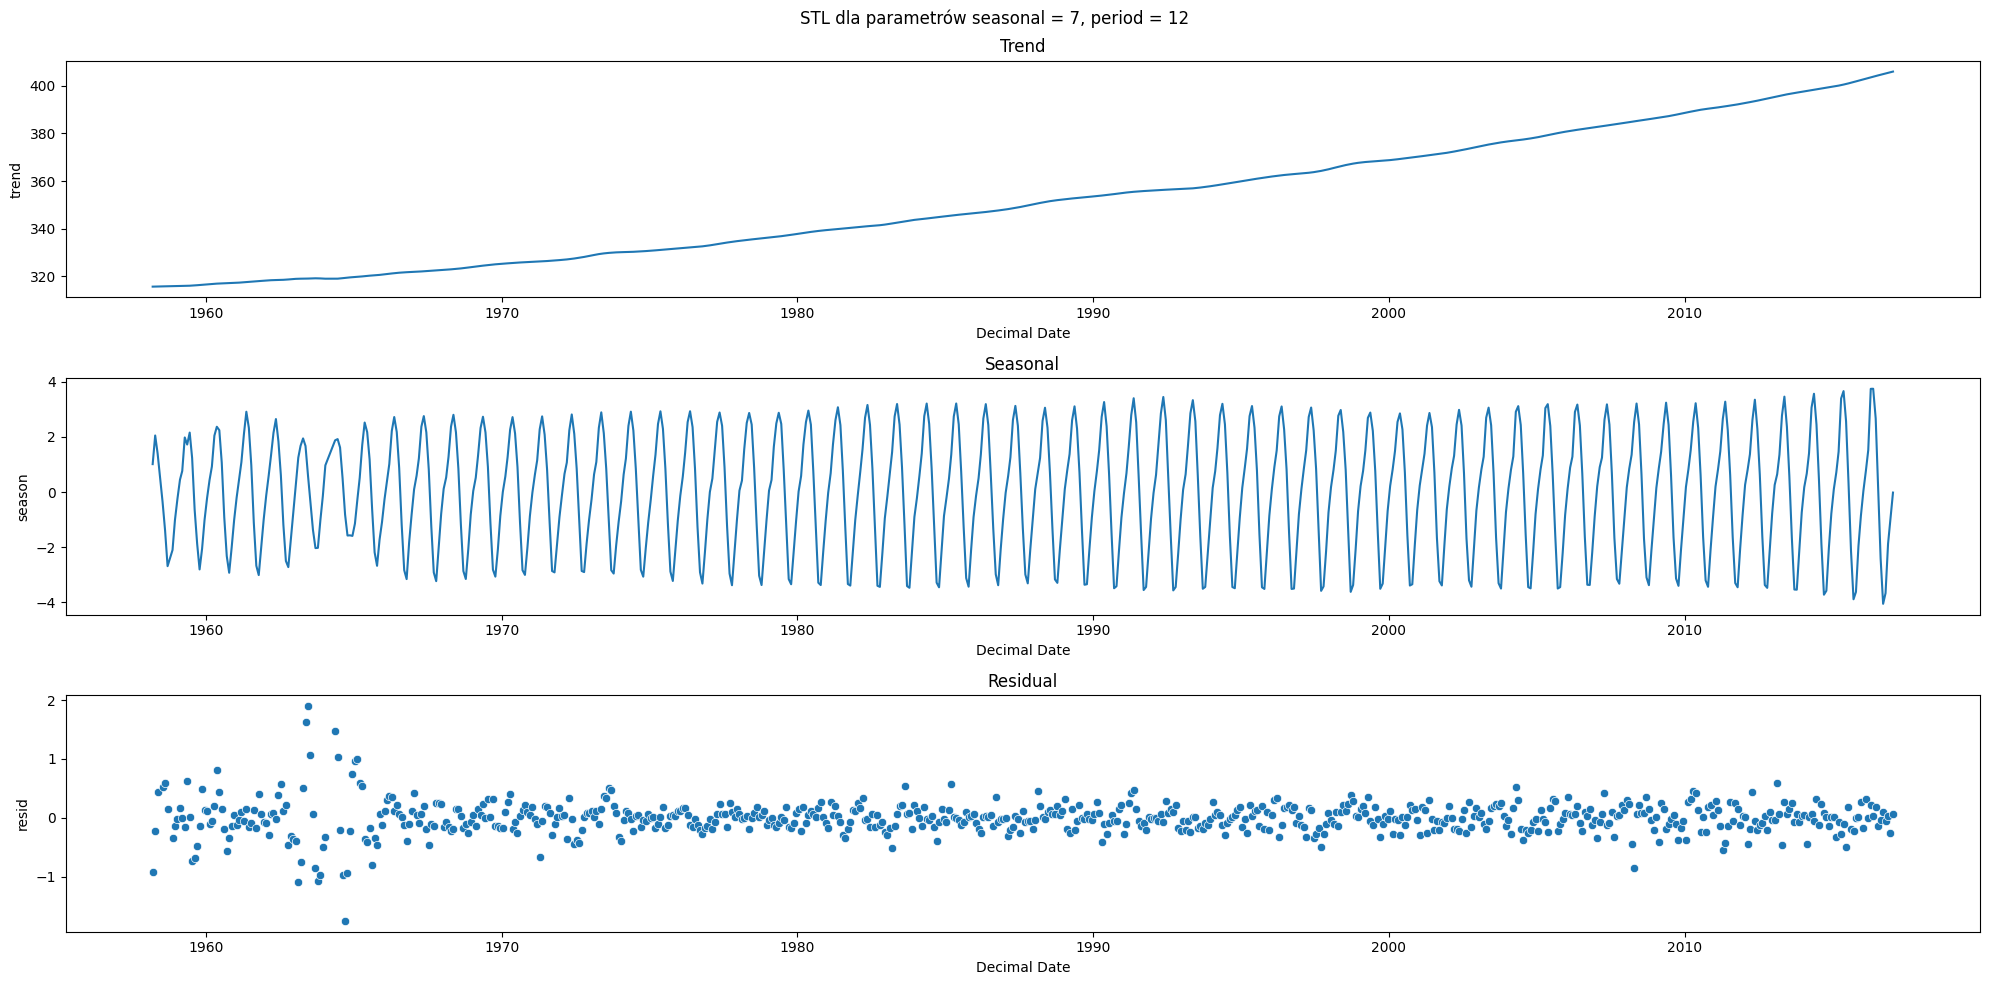

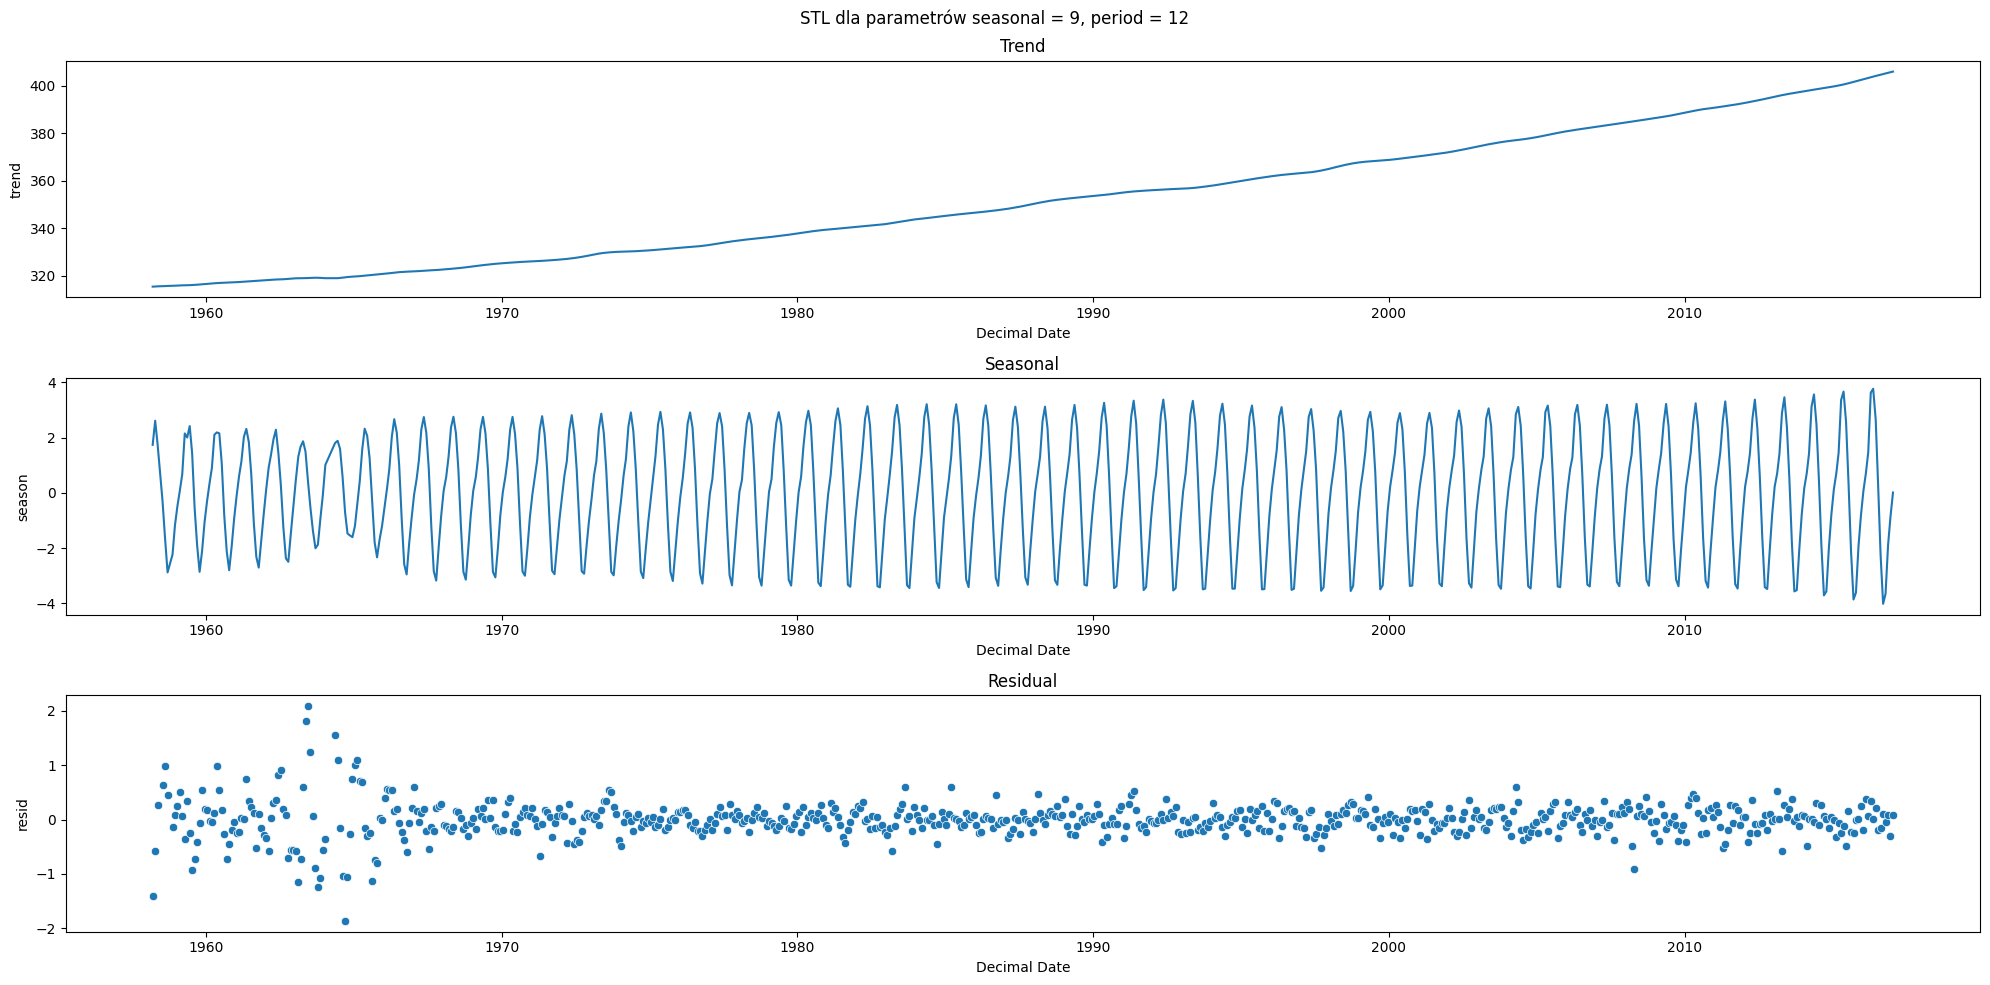

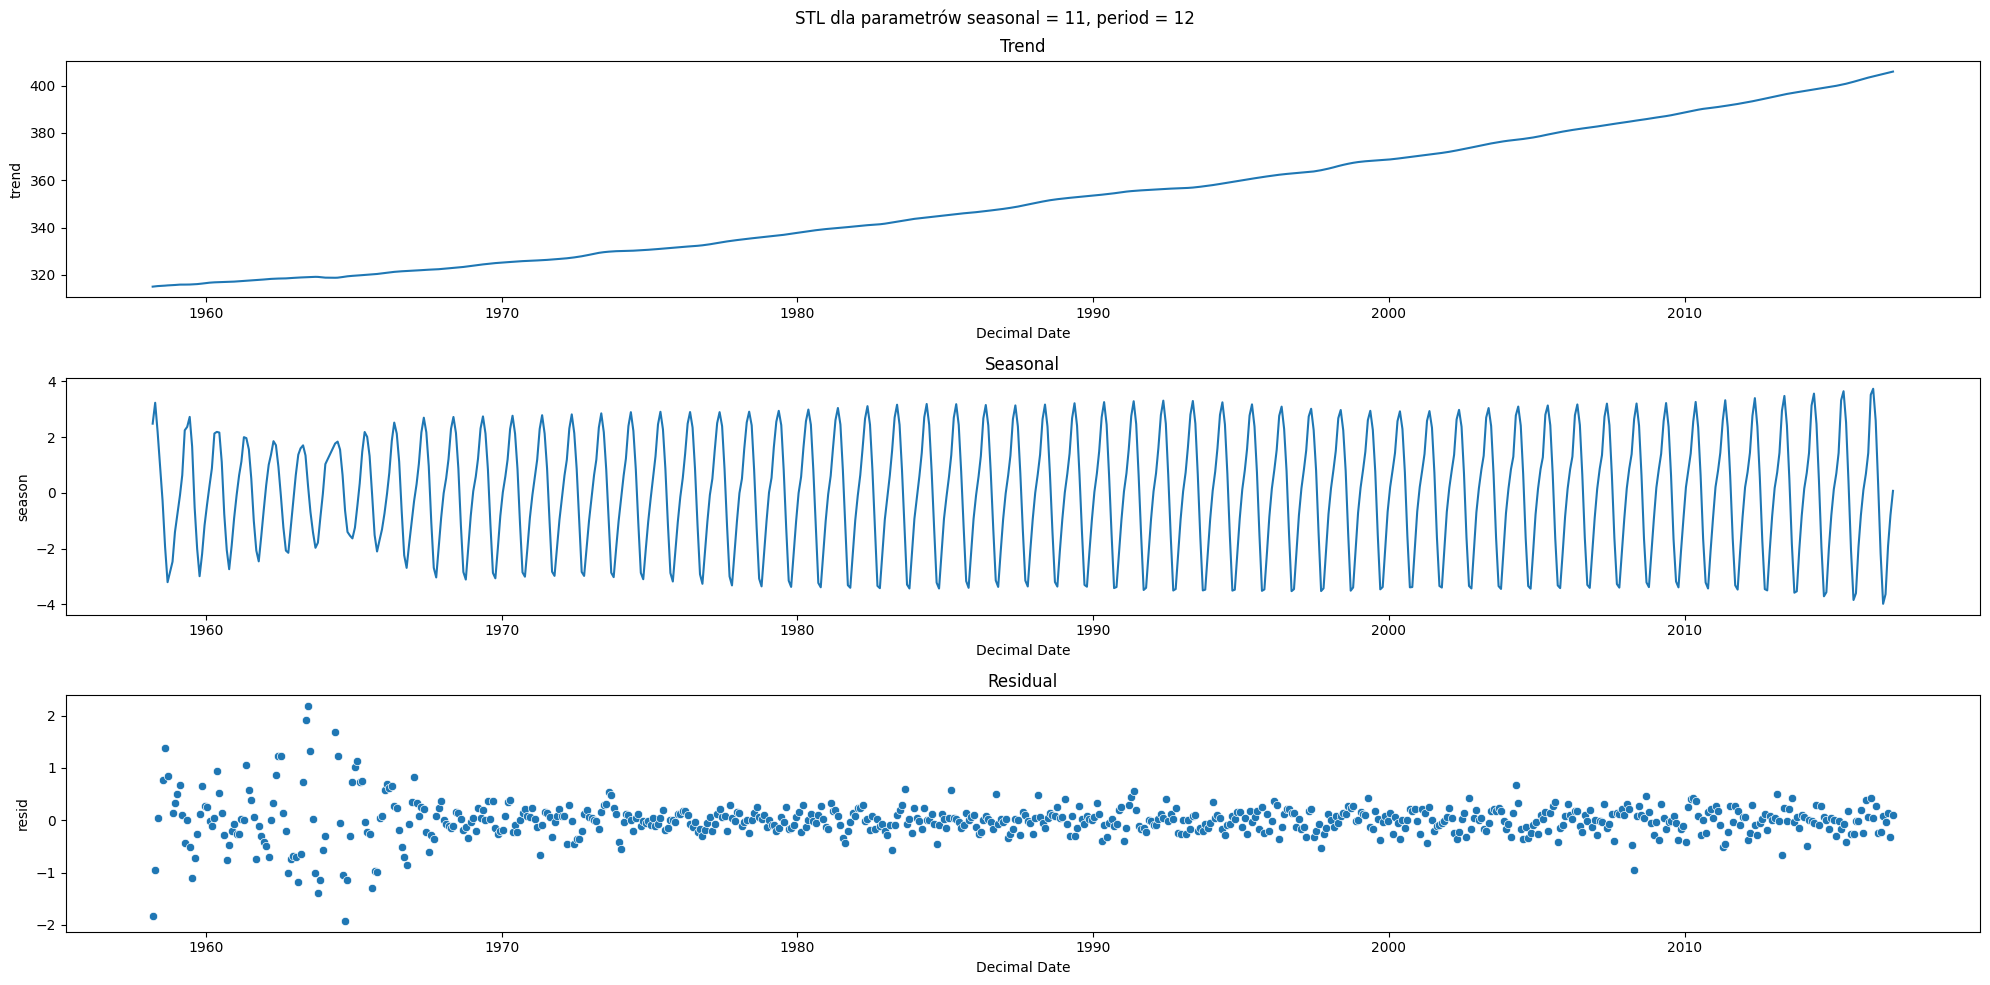

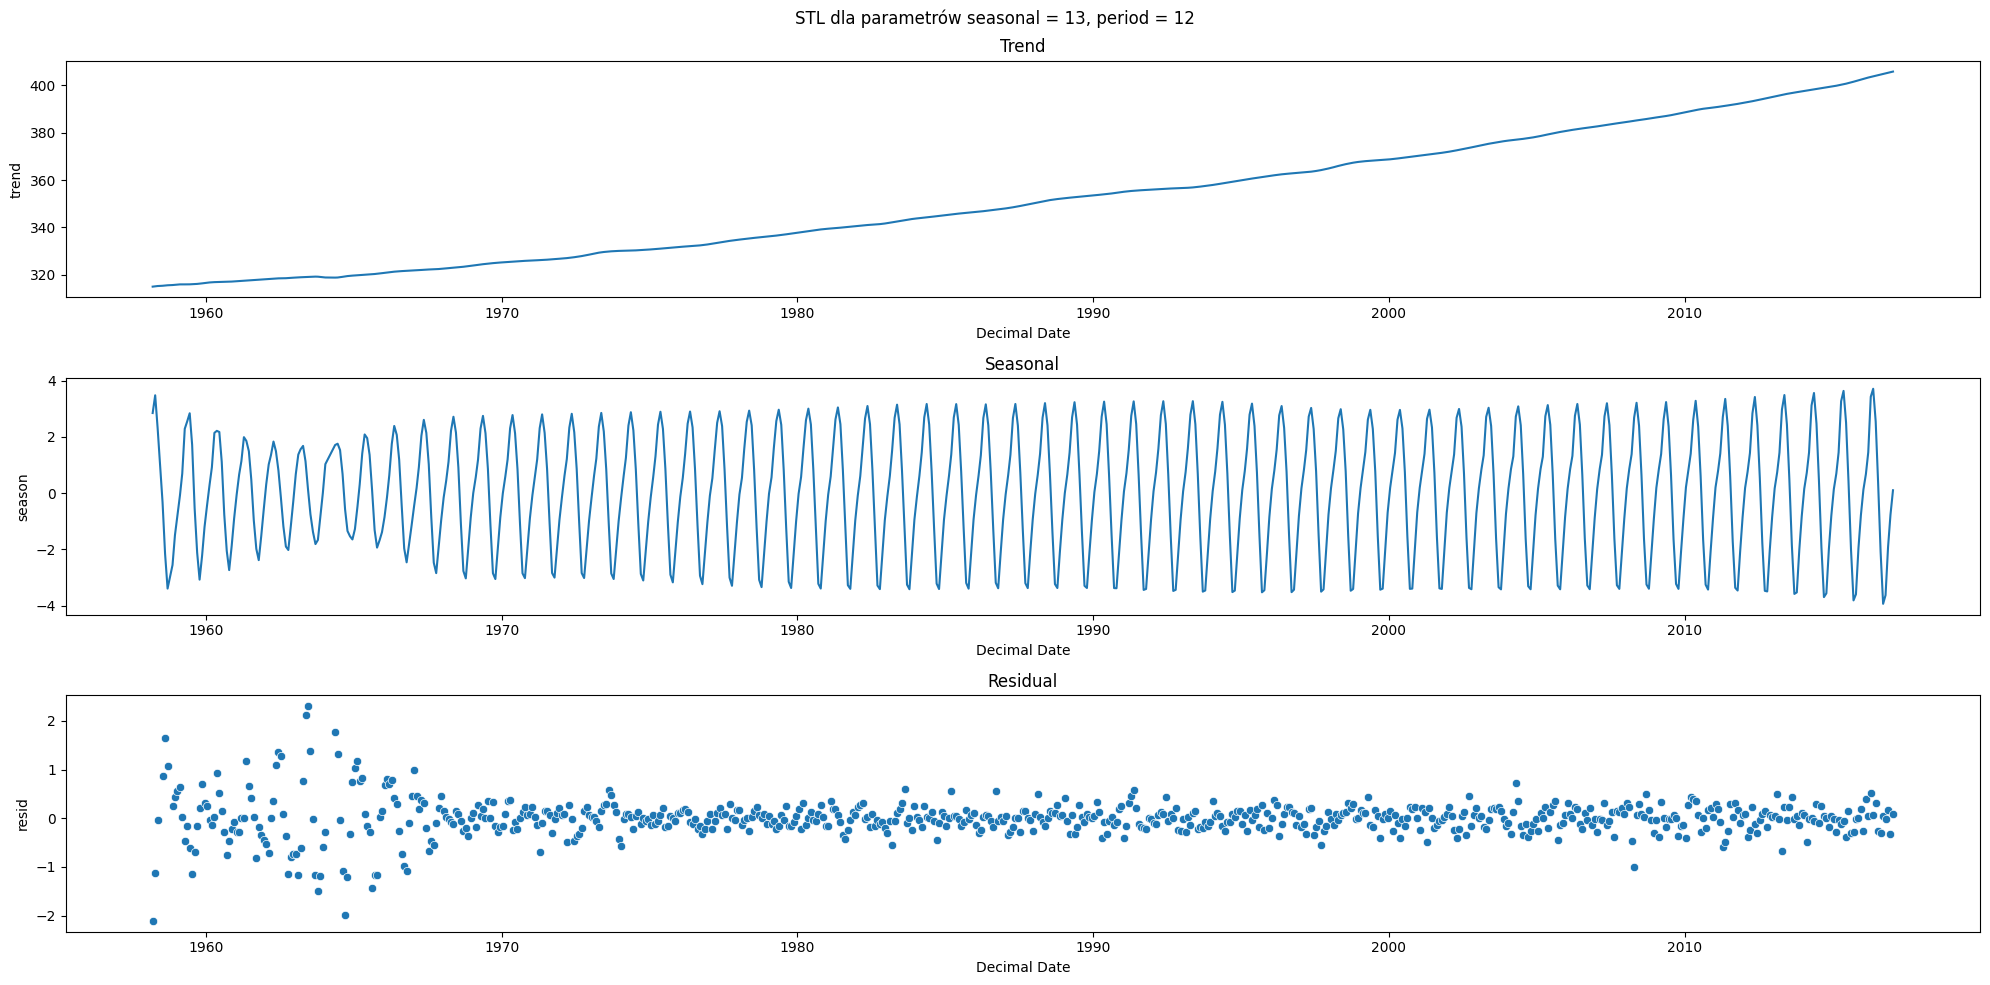

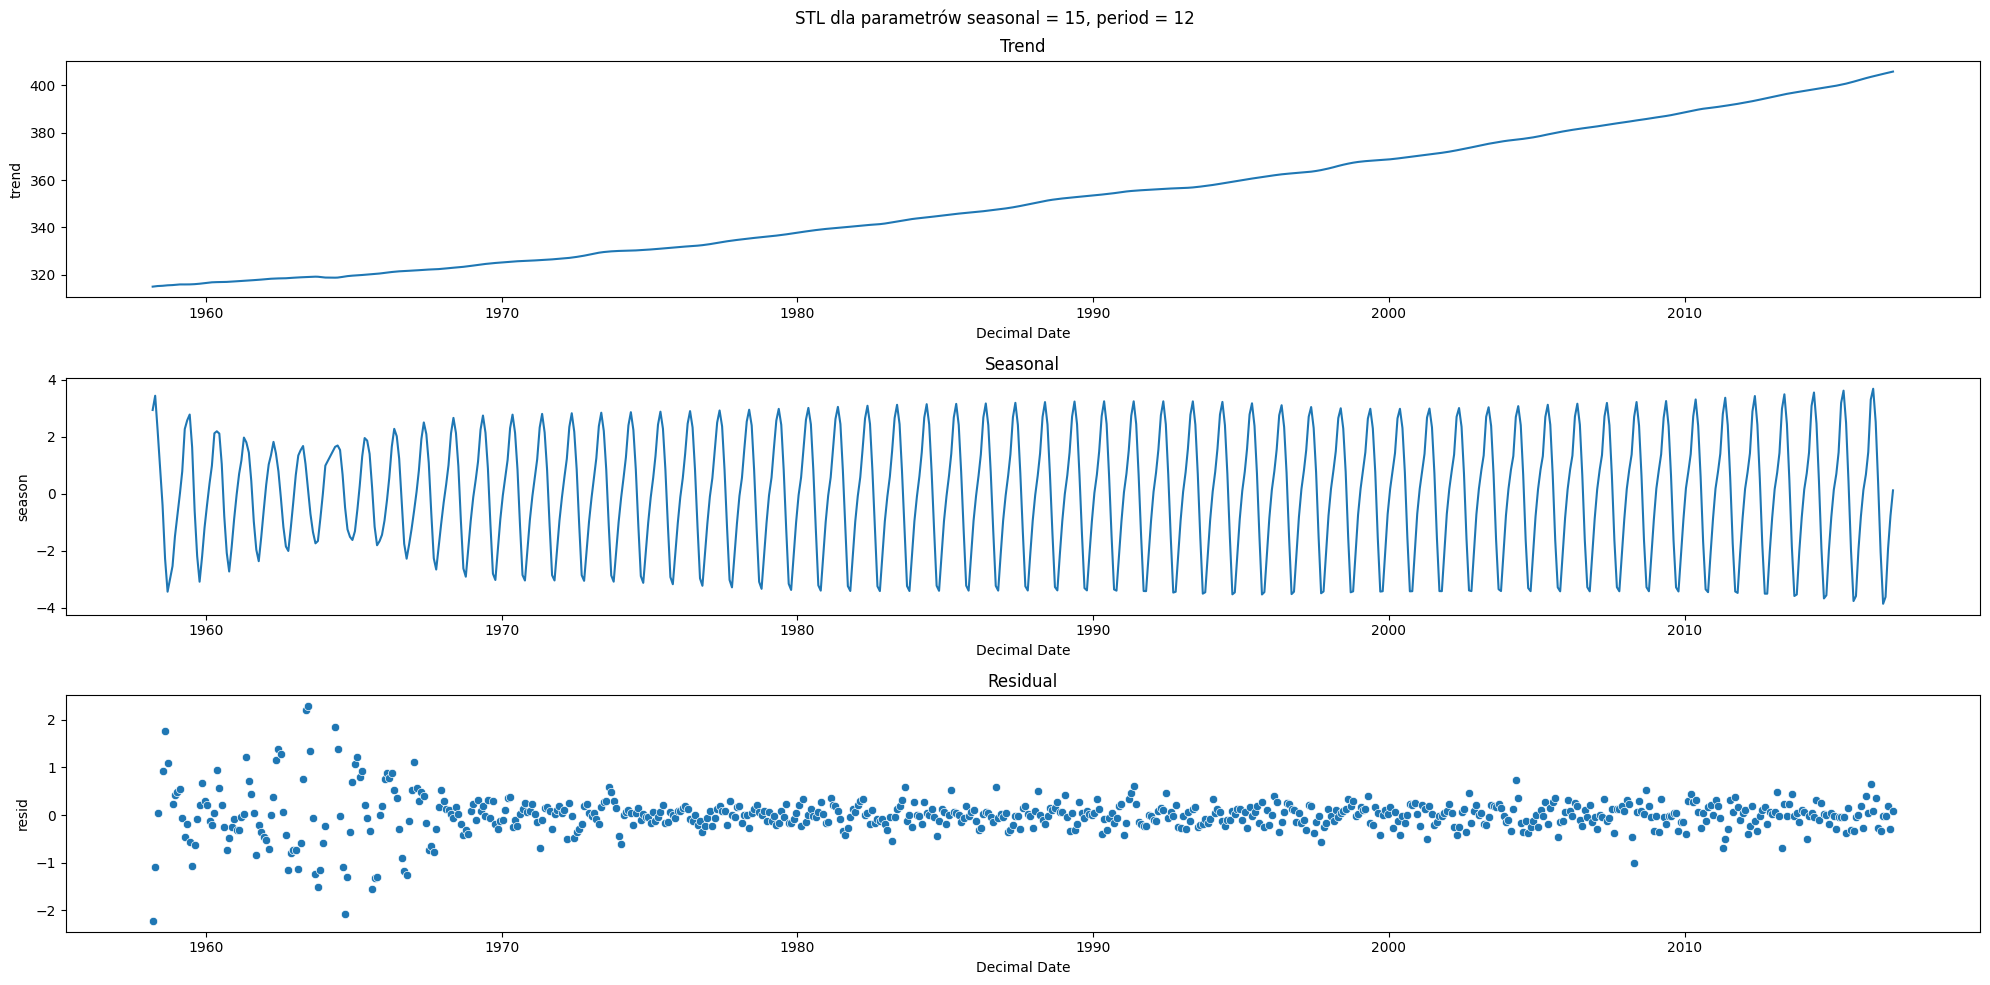

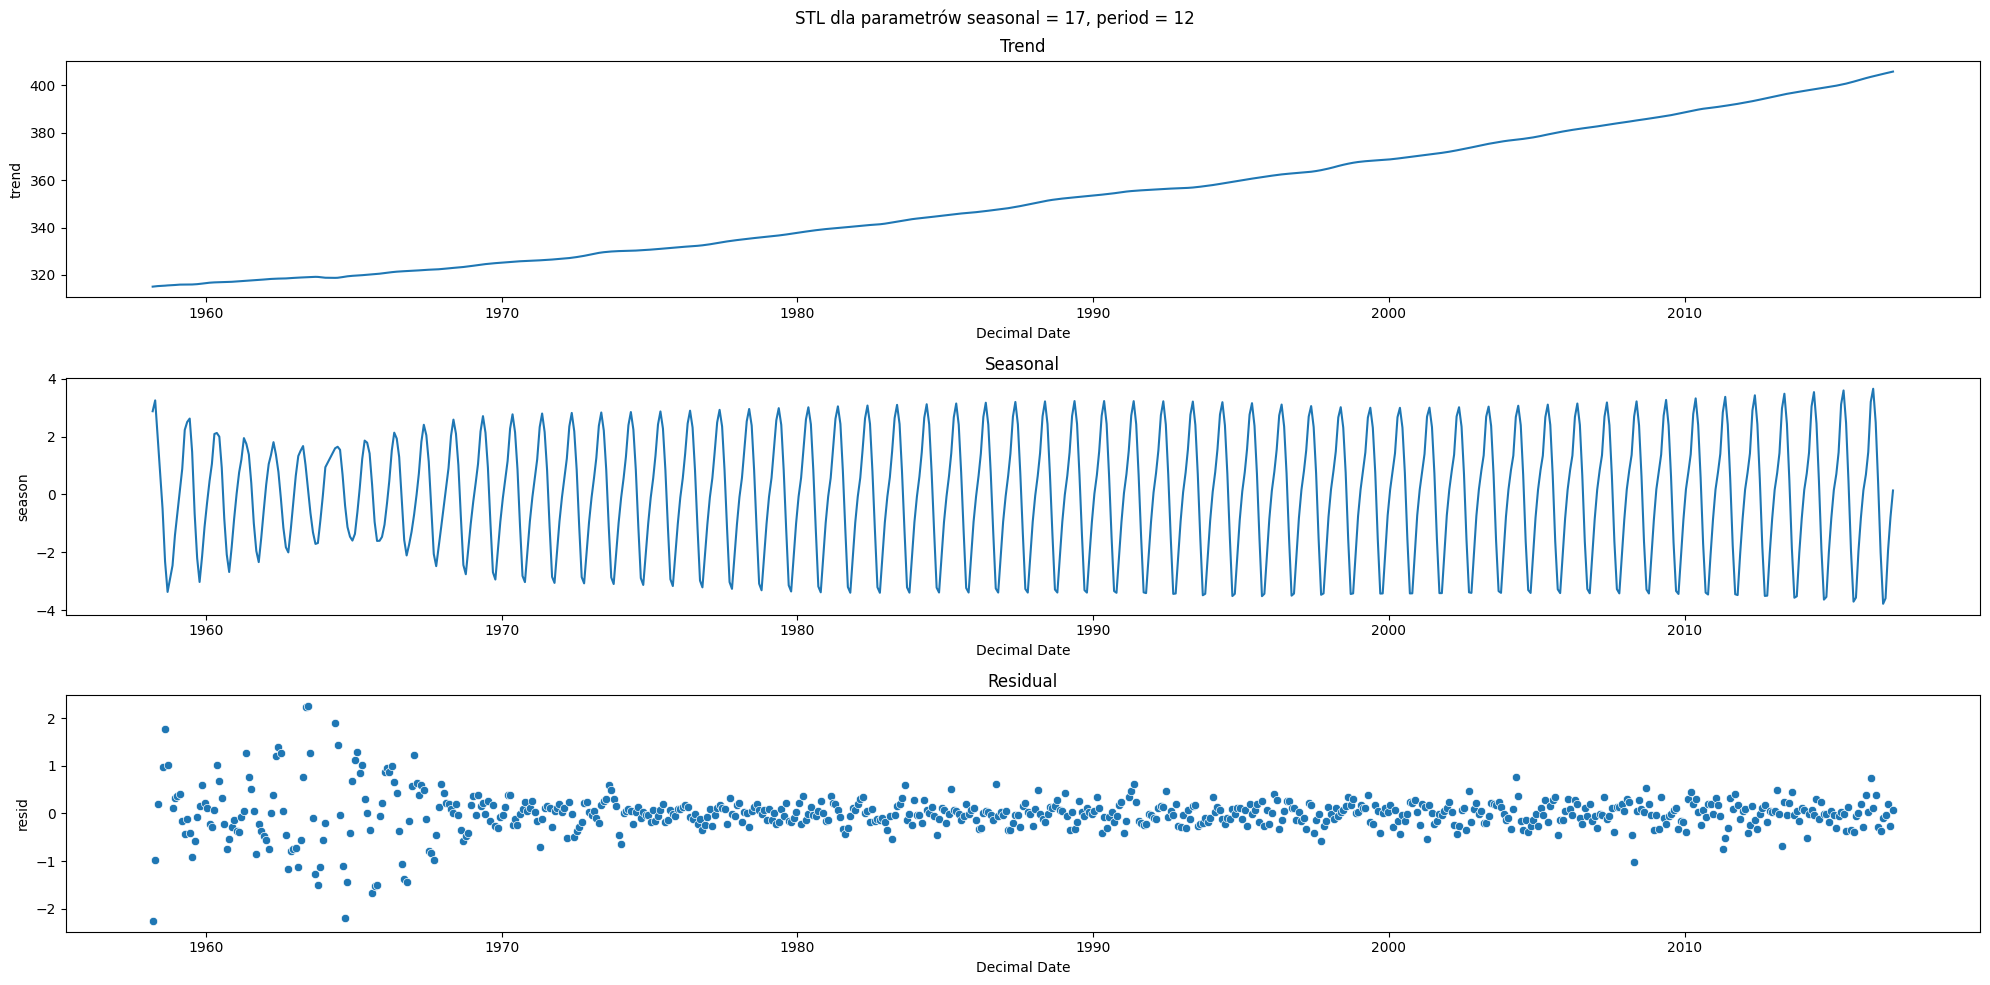

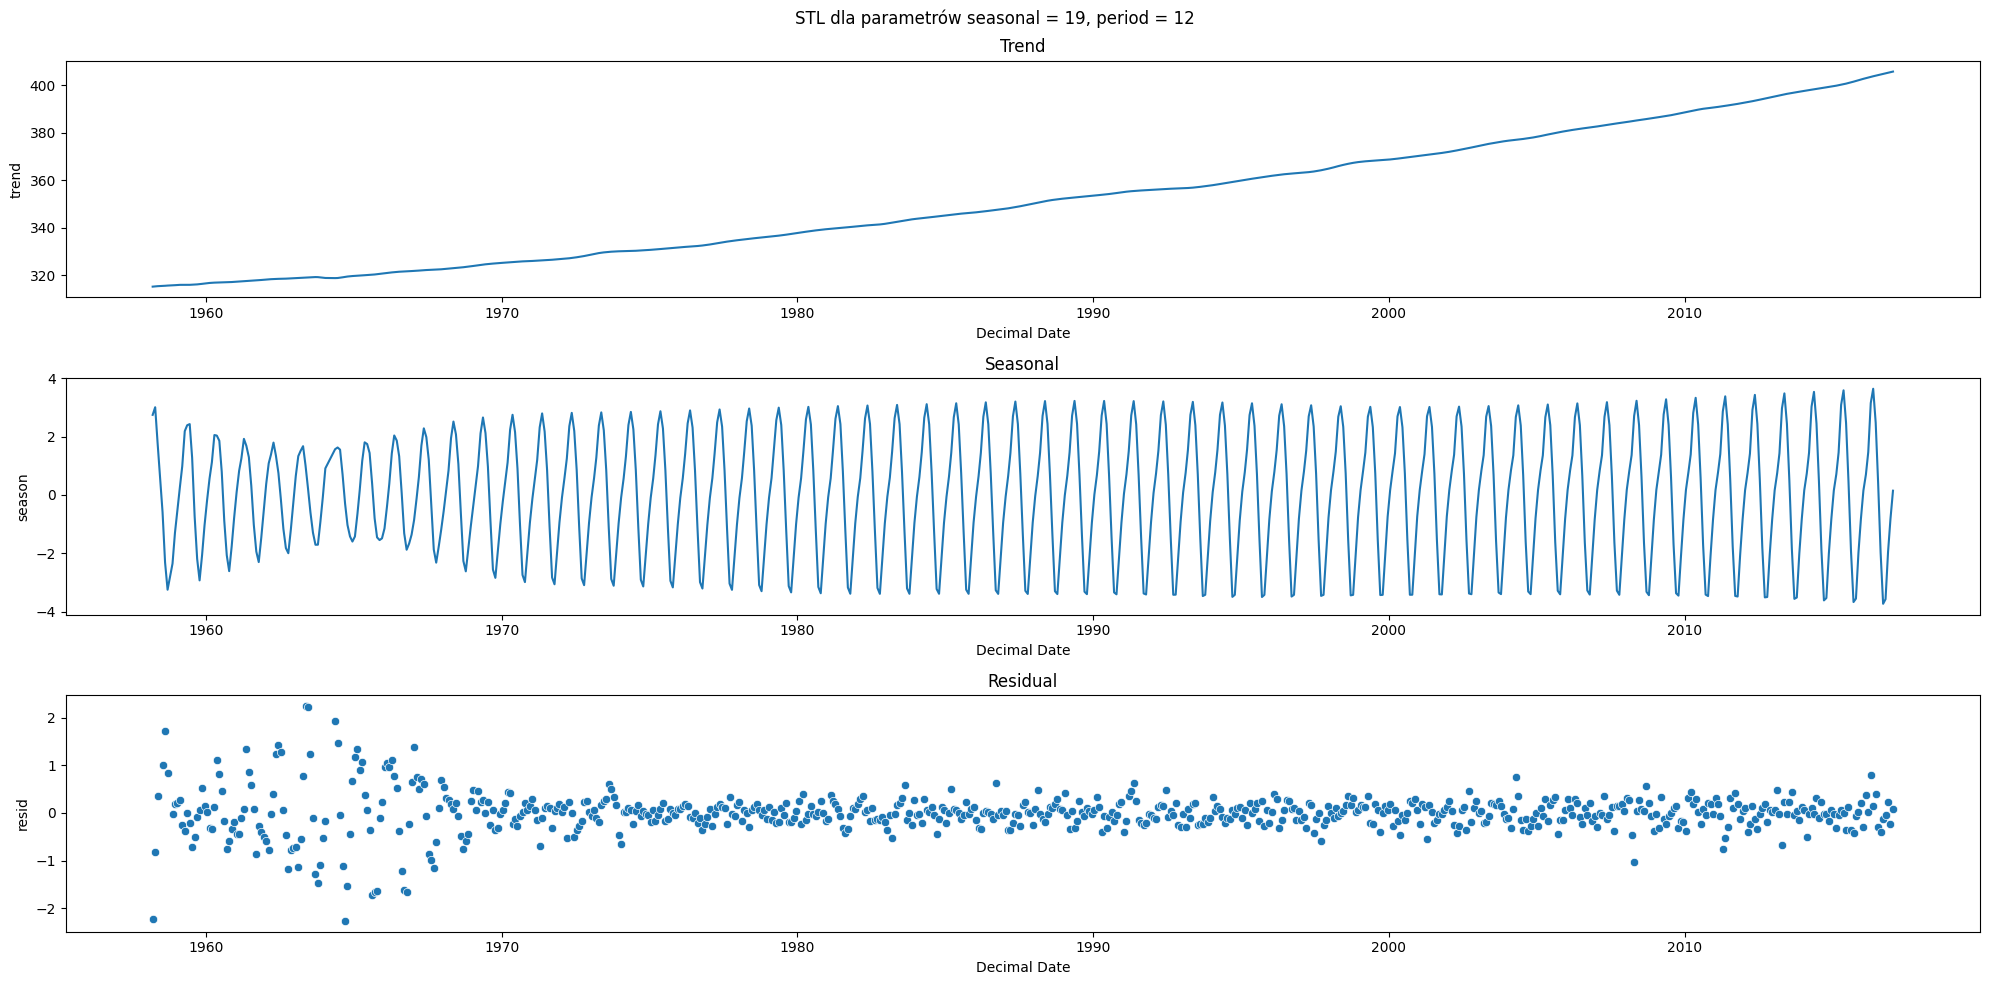

In [13]:
for s in range(3,21,2):
    result = STL(df['Carbon Dioxide (ppm)'], seasonal=s, period= 12).fit()
    trend, seasonal, residual = result.trend, result.seasonal, result.resid
    
    draw_plot(trend, seasonal, residual,s,12)

Optymalną wartość można określić patrząc na wykres residuów, który ma wartości najmniejsze dla seasonal = 5. Ta wartość wydaje się być optymalną dla modelu.
Nie widać znaczących różnic w wykresach trendu i sezonowości. Możliwe, że parametr period jest istotniejszy od parametru seasonal.

### **3. Różnice w magnitudzie sezonowości pomiędzy stałą a zmienną w czasie.**

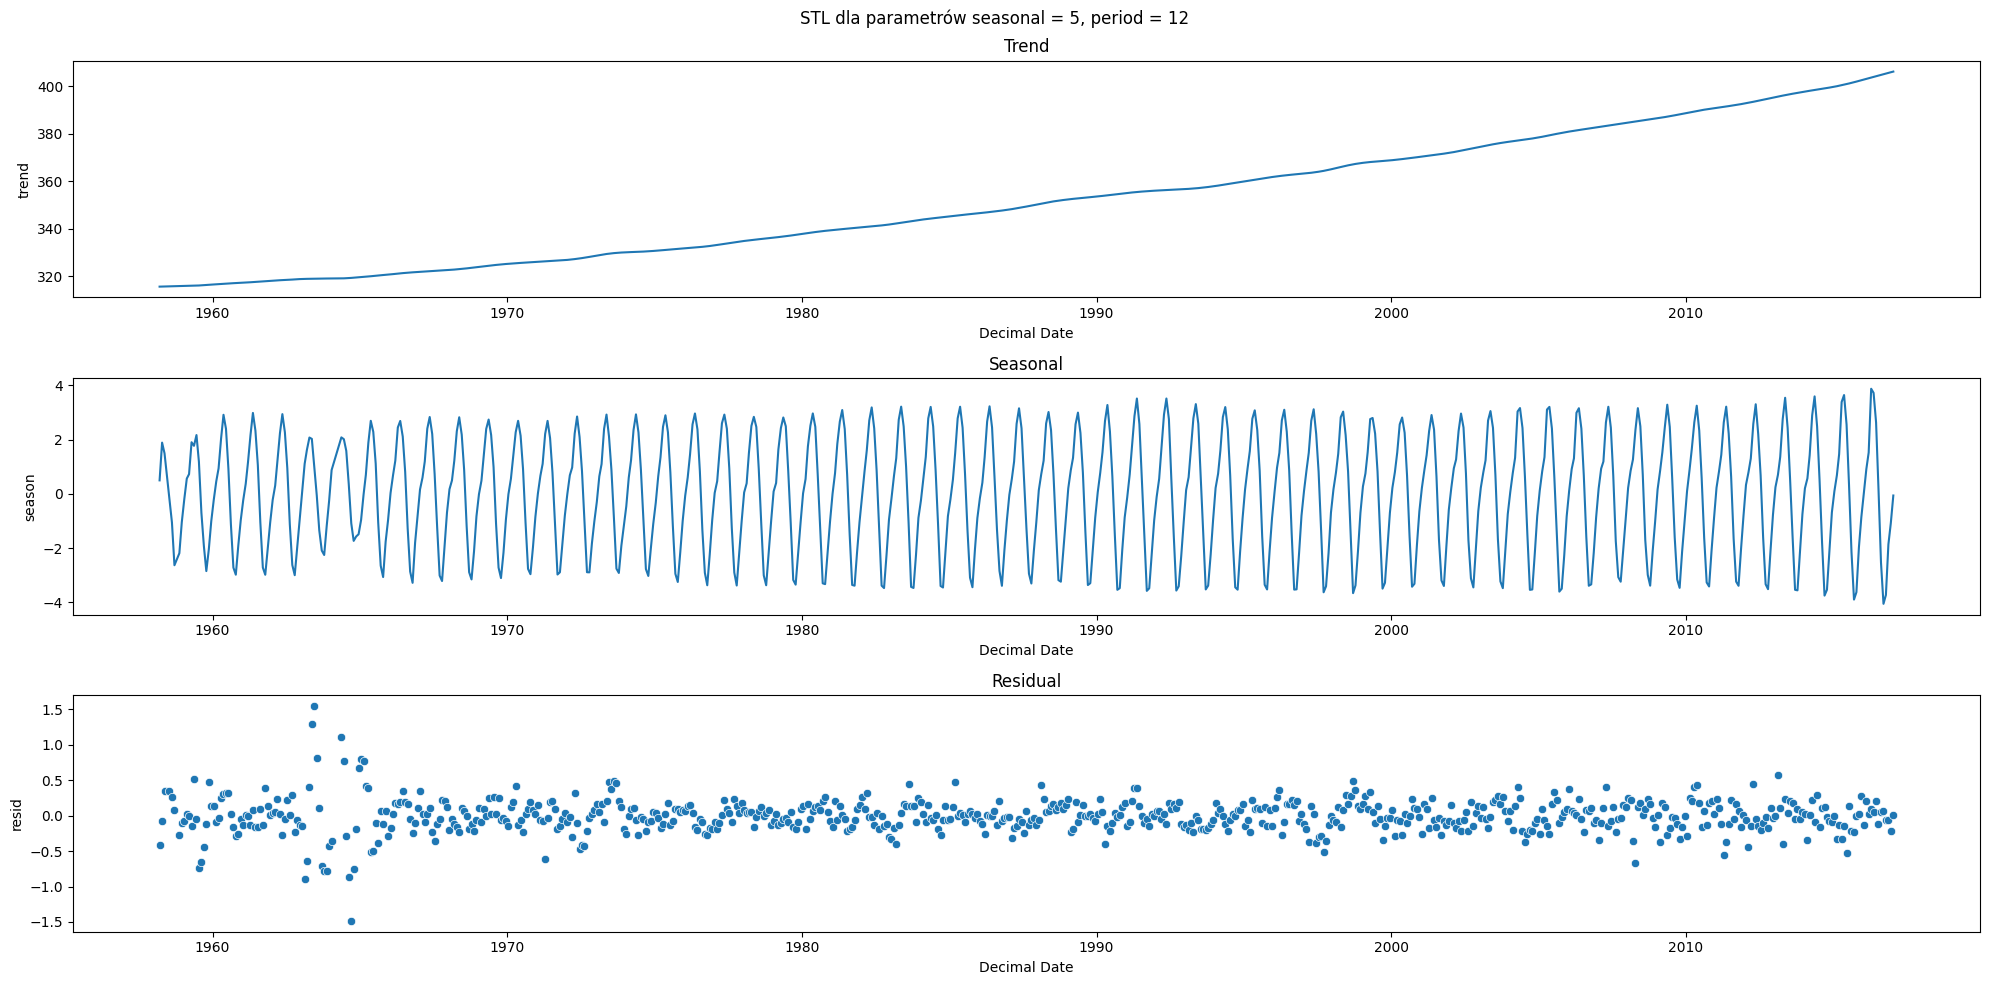

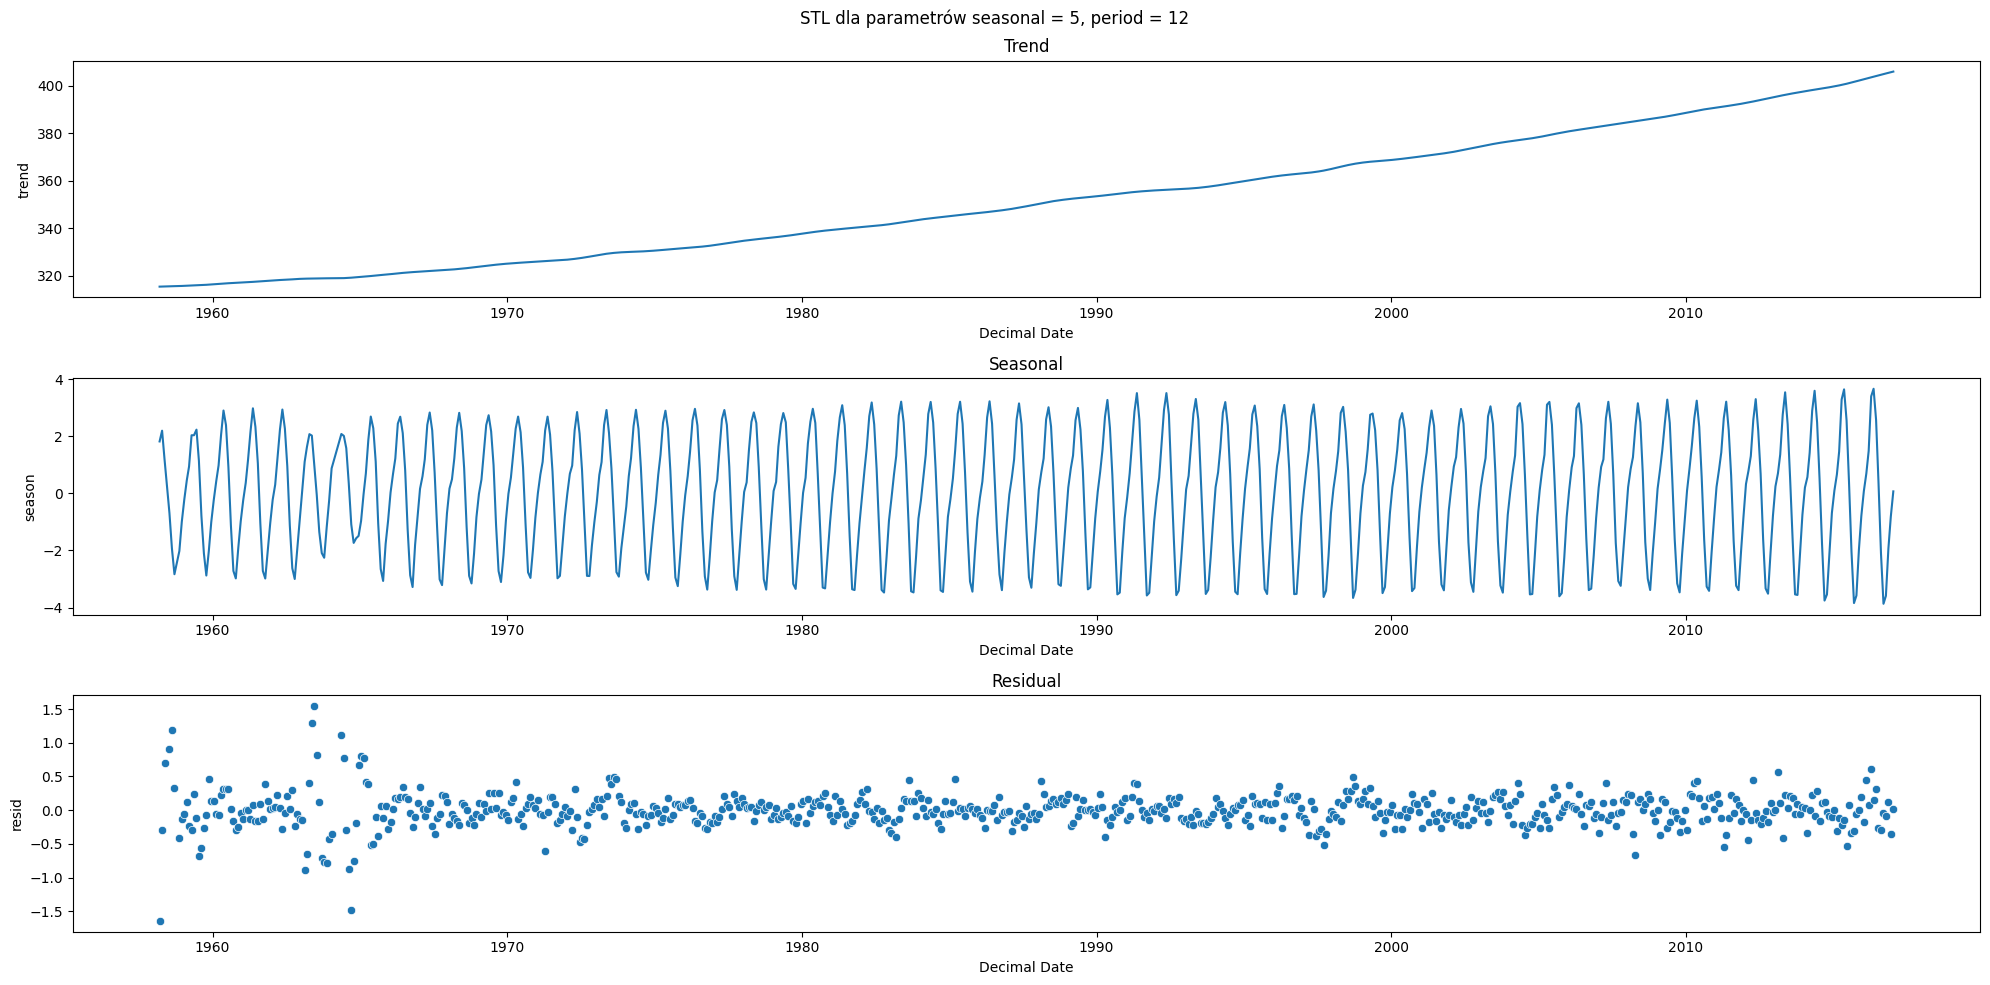

In [21]:

result_1 = STL(df['Carbon Dioxide (ppm)'], seasonal=5, period= 12,seasonal_deg=1 ).fit()
trend_1, seasonal_1, residual_1 = result_1.trend, result_1.seasonal, result_1.resid

draw_plot(trend_1, seasonal_1, residual_1,5,12)


result_2 = STL(df['Carbon Dioxide (ppm)'], seasonal=5, period= 12, seasonal_deg = 0).fit()
trend_2, seasonal_2, residual_2 = result_2.trend, result_2.seasonal, result_2.resid

draw_plot(trend_2, seasonal_2, residual_2,5,12)

Wykresy dla stałej magnitudy oraz zmiennej są niemal identyczne.

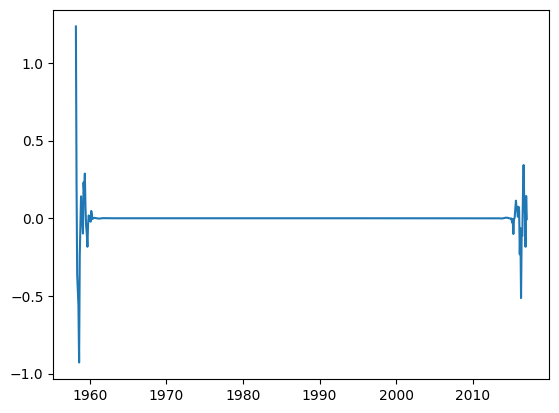

In [22]:
plt.plot(residual_1-residual_2)

Jedyna obserwowana różnica to inne wartości residuów na krańcach przedziałów. Widać, że zmienna w czasie magnituda powoduje mniejszą ilość wartości odstających na krańcach przedziałów.

### **4. Na podstawie wykonanych ćwiczeń z dekompozycji tradycyjnej oraz punktów 1-3 dzisiejszego ćwiczenia, zaleć, którą dekompozycję i dlaczego warto wykorzystać do generowania cech do modelu uczenia maszynowego.**

<br><br>
Porównując dekompozycję metodą klasyczną do metody STL wydaje się, że lepsza jest ta druga.

Podstawową różnicą między tymi metodami jest to, że STL uwzględnia zmienną w czasie sezonowość - co jest dużym plusem, ponieważ wydaje się, że całkowicie stała sezonowość nie występuje w rzeczywistych przypadkach zbyt często. Ponadto, jeśli konieczna jest stała sezonowość, STL pozwala ustawić parametr seasonal_deg = 0. Przy porównaniu magnitudy stałej i zmiennej w czasie wyszło również, że zmienna magnituda lepiej radzi sobie z wartościami brzegowymi.

Ogólnie, metoda STL, poza większym skomplikowaniem w porównaniu do metody klasycznej, wydaje się być lepsza (lub niegorsza) w każdym aspekcie, dlatego tą dekompozycję warto wykorzystać do generowania cech do modelu uczenia maszynowego.


### **5.Dokonaj interpretacji trendu, sezonowości oraz reszt dla dekompozycji, która Twoim zdaniem przynosi najbardziej optymalne wyniki.**

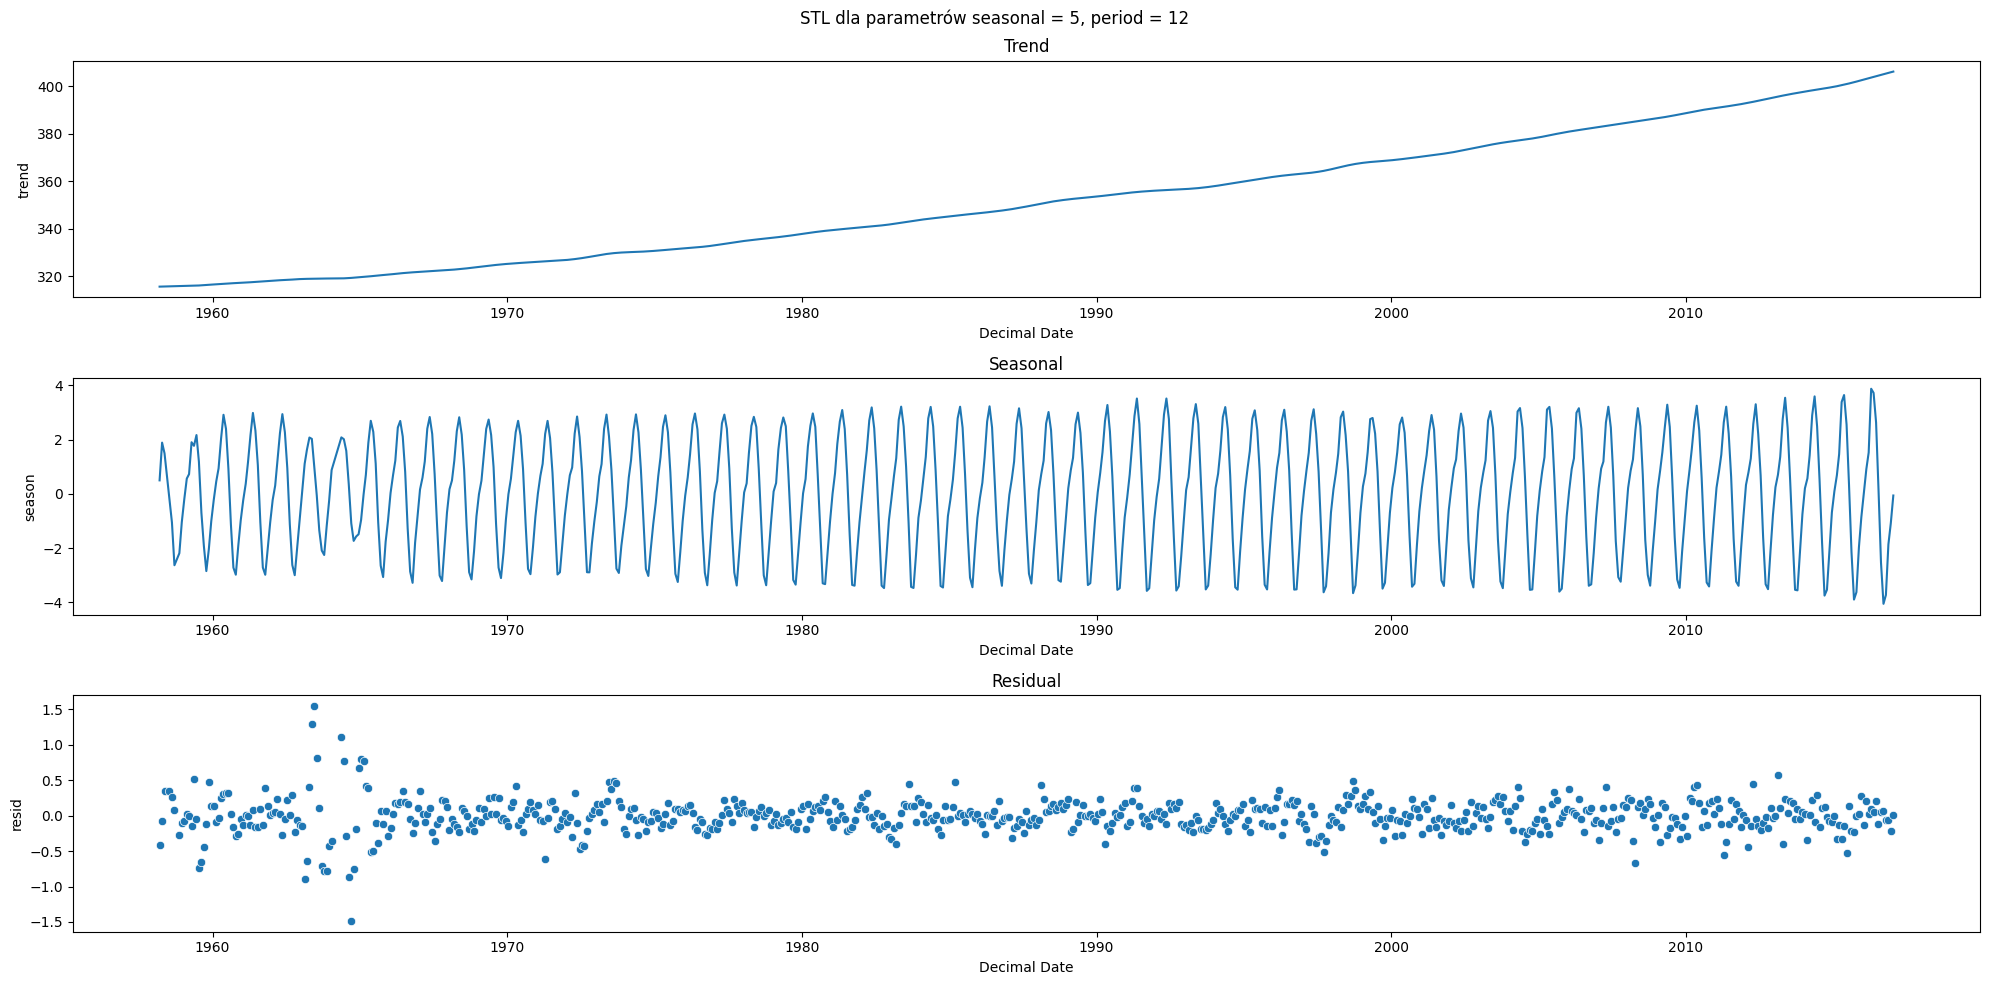

In [23]:
result_1 = STL(df['Carbon Dioxide (ppm)'], seasonal=5, period= 12,seasonal_deg=1 ).fit()
trend_1, seasonal_1, residual_1 = result_1.trend, result_1.seasonal, result_1.resid

draw_plot(trend_1, seasonal_1, residual_1,5,12)

1. Trend wykazuje regularny, niemal liniowy wzrost stężenia dwutlenku węgla na przestrzeni lat. Zauważalne jest, że w ostatnich latach ten wzrost robi się coraz gwałtowniejszy.
2. Sezonowość jest zmienna w czasie, jednak widoczne jest, że jej amplituda oscyluje pomiędzy wartościami <-3,3>. W ostatnich jednak latach widoczny jest największy wzrost amplitudy mniej więcej do poziomu 4. Na wykresie sezonowości widoczne jest zaburzenie sygnału na początku pomiarów oraz w latach 1963-1964.
3. Residua dla większości sygnału osiągają podobne wartości. Wartości najbardziej odstające występują dla zaburzenia sygnału w latach 1963-1964.